## Installing and importing packages


In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', 200)

## Reading in data

In [142]:
# Paths to Excel files
school_data_path = r'C:\Users\mokha\OneDrive\Desktop\Schools data\image analysis\school_data.xlsx'

# Load all sheets from the provided Excel files
school_data_sheets = pd.read_excel(school_data_path, sheet_name=None)

# Get the sheet names
school_sheet_names = school_data_sheets.keys()

print("School Data Sheets:", list(school_sheet_names))

School Data Sheets: ['WC', 'NW', 'NC', 'MP', 'LP', 'KZN', 'GT', 'FS', 'EC']


In [143]:
# Paths to Excel files
demographics_data_path = r'C:\Users\mokha\OneDrive\Desktop\Schools data\2022 excel\Demographics.xlsx'

# Load all sheets from the provided Excel files
demographics_data_sheets = pd.read_excel(demographics_data_path, sheet_name=None)

# Get the sheet names
demographics_sheet_names = demographics_data_sheets.keys()

print("Demographics Data Sheets:", list(demographics_sheet_names))

Demographics Data Sheets: ['province_main_Income_source', 'Province by Age group', 'province_internet_library', 'province_desktop_laptop', 'province_access_electricity', 'province_employment_status', 'province_geography_type', 'province_time_taken_to_school', 'province_public_independent', 'province_highest_education_leve', 'province_educational_institutio', 'Population']


# 2. Data Understanding and Preparation

Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis. Key steps include:
  
**Collecting:** Gathering raw data from various sources.  
**Cleaning:** Removing or correcting any errors or inconsistencies in the data. This includes handling missing values, correcting data types, and removing duplicates.  
**Integrate data:** Merge data sheets, check for duplicate rows.  
  
By following these steps, raw data is transformed into a structured format that is ready for further analysis.

## 2.1 Display contents of school data sheets and Demographics data sheets


School Data

In [144]:
# Display contents of school data sheets
print('Gauteng school datasheet:')
school_data_sheets['GT'].head()

Gauteng school datasheet:


,NatEmis,Province,Official_Institution_Name,Status,Sector,Type_DoE,Phase_PED,Specialisation,EIDistrict,OwnerLand,OwnerBuild,GIS_Longitude,GIS_Latitude,LMunName,SP_Name,Addressee,Township_Village,Suburb,Town_City,StreetAddress,Quintile,Registration_Date,NoFeeSchool,Urban_Rural,Learners2023,Educators2023
0,700110015,GT,DALEVIEW SECONDARY SCHOOL,OPEN,PUBLIC,ORDINARY SCHOOL,SECONDARY SCHOOL,ORDINARY SCHOOL,JOHANNESBURG SOUTH,PUBLIC,PUBLIC,28,-26,CITY OF JOHANNESBURG METROPOLITAN MUNICIPALITY,ENNERDALE EXT 9,PULE ABEL MOTSOMI,EXT. 9,ENNERDALE,JOHANNESBURG,"1, C/O VAN ROOYEN CRESCENT & SAMUEL ROAD, EXT....",Q2,NaN,YES,URBAN,1725,43
1,700110023,GT,ENNERDALE SECONDARY SCHOOL,OPEN,PUBLIC,ORDINARY SCHOOL,SECONDARY SCHOOL,ORDINARY & TECHNICAL,JOHANNESBURG SOUTH,PUBLIC,PUBLIC,28,-26,CITY OF JOHANNESBURG METROPOLITAN MUNICIPALITY,ENNERDALE EXT 2,DR. J.A.SOULS,ENNERDALE,UNKNOWN,JOHANNESBURG,"3622, AGAAT STREET, ENNERDALE, , JOHANNESBURG",Q5,NaN,YES,URBAN,1846,69
2,700110031,GT,LAWLEY PRIMARY SCHOOL,OPEN,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,JOHANNESBURG SOUTH,PUBLIC,PUBLIC,28,-26,CITY OF JOHANNESBURG METROPOLITAN MUNICIPALITY,LAWLEY EXT 2,J.Z BUTHELEZI,ENNERADALE,JOHANNESBURG,JOHANNESBURG,"461, 3RD AVENUE, ENNERADALE, JOHANNESBURG, JOH...",Q1,NaN,YES,URBAN,2530,66
3,700110049,GT,POSEIDON ROAD PRIMARY SCHOOL,OPEN,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,JOHANNESBURG SOUTH,PUBLIC,PUBLIC,28,-26,CITY OF JOHANNESBURG METROPOLITAN MUNICIPALITY,ENNERDALE EXT 3,NOZIPHO SIWELA,ENNERDALE,ENNERDALE,JOHANNESBURG,"2991, POSEIDON STREET, ENNERDALE, ENNERDALE, J...",Q5,NaN,NO,URBAN,1553,46
4,700110056,GT,ALPHA PRIMARY SCHOOL,OPEN,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,JOHANNESBURG CENTRAL,PUBLIC,PUBLIC,28,-26,CITY OF JOHANNESBURG METROPOLITAN MUNICIPALITY,LENASIA EXT 1,HASINA MAHOMED,EXTENSION 1,LENASIA,JOHANNESBURG,"1, WIDGEON & WEAVERBIRD STREETS, EXTENSION 1, ...",Q5,NaN,NO,URBAN,924,30


Household Survey Data 2023

In [145]:
# Display contents of demographics data sheets
print('Age group by Province:')
demographics_data_sheets['Province by Age group'].round(0)

Age group by Province:


,Province,age_0 _04,age_5_24,age_25_64,age_65_plus
0,Western Cape,615122,2246315,3886267,483154
1,Eastern Cape,659534,2506026,2894760,478735
2,Northern Cape,130388,450328,619179,94149
3,Free State,278702,1066381,1465424,189931
4,KwaZulu-Natal,1163503,4511884,5529820,616834
5,North West,432755,1509807,2020763,243083
6,Gauteng,1311912,5101062,8974542,879078
7,Mpumalanga,507516,1814834,2296910,237951
8,Limpopo,712015,2446701,2691308,317495


## 2.2 Drop unwanted columns

School data sheets

In [146]:
# Function to drop columns
def drop_columns_from_dataframe(df, columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    return df

# Columns to drop from each sheet
columns_to_drop = [
    'SP_Name', 'Suburb', 'Town_City','GIS_Longitude', 'GIS_Latitude','OwnerLand',
    'OwnerBuild', 'Township_Village', 
    'LMunName', 'StreetAddress', 'Registration_Date','NoFeeSchool','Status','EIDistrict',
    'Column27', 'Addressee'
]

# Dictionary to hold the cleaned DataFrames
cleaned_sheets = {}

# Iterate over each sheet, drop the columns, and store the cleaned DataFrame
for sheet_name, df in school_data_sheets.items():
    cleaned_sheets[sheet_name] = drop_columns_from_dataframe(df, columns_to_drop)

# Verify the result
# for sheet_name, df in cleaned_sheets.items():
#    print(f"\n{sheet_name} DataFrame after dropping columns:")
#    print(df.columns)  # Display the first few rows of each cleaned DataFrame

In [147]:
# Print the head of one of the cleaned DataFrame
school_data_sheets['GT']

,NatEmis,Province,Official_Institution_Name,Sector,Type_DoE,Phase_PED,Specialisation,Quintile,Urban_Rural,Learners2023,Educators2023
0,700110015,GT,DALEVIEW SECONDARY SCHOOL,PUBLIC,ORDINARY SCHOOL,SECONDARY SCHOOL,ORDINARY SCHOOL,Q2,URBAN,1725,43
1,700110023,GT,ENNERDALE SECONDARY SCHOOL,PUBLIC,ORDINARY SCHOOL,SECONDARY SCHOOL,ORDINARY & TECHNICAL,Q5,URBAN,1846,69
2,700110031,GT,LAWLEY PRIMARY SCHOOL,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,Q1,URBAN,2530,66
3,700110049,GT,POSEIDON ROAD PRIMARY SCHOOL,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,Q5,URBAN,1553,46
4,700110056,GT,ALPHA PRIMARY SCHOOL,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,Q5,URBAN,924,30
...,...,...,...,...,...,...,...,...,...,...,...
3051,700932331,GT,WEDELA PRIMARY SCHOOL,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,Q3,URBAN,738,24
3052,700932332,GT,WEDELA TECHNICAL SECONDARY SCHOOL,PUBLIC,ORDINARY SCHOOL,SECONDARY SCHOOL,TECHNICAL SCHOOL,Q3,URBAN,1362,48
3053,700932347,GT,XHOBANI PRIMARY SCHOOL,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,Q1,URBAN,1454,43
3054,700934044,GT,RETLILE PRIMARY SCHOOL,PUBLIC,ORDINARY SCHOOL,PRIMARY SCHOOL,ORDINARY SCHOOL,Q3,URBAN,1471,40


## 2.3 Handle missing values

In [148]:
# Function to identify and print missing values in each sheet
def identify_missing_values(data_sheets):
    for sheet_name, sheet_data in data_sheets.items():
        print(f"\nMissing values in sheet: {sheet_name}")
        missing_data = sheet_data.isnull().sum()
        if missing_data[missing_data > 0].empty:
            print("No missing values found.")
        else:
            print(missing_data[missing_data > 0])

School data sheets


In [149]:
# Identify missing values in school data sheets
print("School Data Sheets - Missing Values:")
identify_missing_values(school_data_sheets)

School Data Sheets - Missing Values:

Missing values in sheet: WC
Quintile         138
Learners2023      17
Educators2023     17
dtype: int64

Missing values in sheet: NW
Quintile         104
Educators2023      1
dtype: int64

Missing values in sheet: NC
Quintile         43
Educators2023     3
dtype: int64

Missing values in sheet: MP
Quintile    137
dtype: int64

Missing values in sheet: LP
Quintile         217
Educators2023      2
dtype: int64

Missing values in sheet: KZN
Quintile         270
Learners2023      44
Educators2023     41
dtype: int64

Missing values in sheet: GT
Quintile         988
Learners2023      76
Educators2023    102
dtype: int64

Missing values in sheet: FS
Quintile    84
dtype: int64

Missing values in sheet: EC
Quintile    288
dtype: int64


Demographics data sheets

In [150]:
# Identify missing values in demographics data sheets
# print("Demographics Data Sheets - Missing Values:")
# identify_missing_values(demographics_data_sheets)

### 2.3.1 Handling missing values in School Data Sheets

In [151]:
# Step 1: Handle missing values for specific columns
def handle_missing_values_step1(data_sheets):
    for sheet_name, sheet_data in data_sheets.items():
       # print(f"\nHandling missing values in sheet: {sheet_name}")
                
        # Columns to fill with 'Unknown'
        columns_to_fill_unknown = [col for col in sheet_data.columns if col not in columns_to_drop]
        sheet_data[columns_to_fill_unknown] = sheet_data[columns_to_fill_unknown].fillna('Unknown')

# Handle missing values in school data sheets for specific columns
handle_missing_values_step1(school_data_sheets)



In [152]:
# Step 2: Handle missing values for Educators2023 and Learners2023
def handle_missing_values_step2(data_sheets):
    columns_to_fill_mean = ['Educators2023', 'Learners2023']
    
    for sheet_name, sheet_data in data_sheets.items():
        for column in columns_to_fill_mean:
            if column in sheet_data.columns:
                # Replace 'Null' with NA and convert to numeric
                sheet_data[column] = sheet_data[column].replace('Null', pd.NA)
                sheet_data[column] = pd.to_numeric(sheet_data[column], errors='coerce')
                
                # Fill NA with the mean of the column
                mean_value = sheet_data[column].mean()
                sheet_data[column] = sheet_data[column].fillna(mean_value)
                
                # Convert to int64
                sheet_data[column] = sheet_data[column].astype('int64')


# Handle missing values in school data sheets for Educators2023 and Learners2023
handle_missing_values_step2(school_data_sheets)

### 2.3.2 Verify that missing values have been handled

In [153]:
# Verify that missing values have been handled
# print("School Data Sheets - Missing Values After Step 1 and 2:")
# identify_missing_values(school_data_sheets)

## 2.4 Clean inconsistencies and errors

In [155]:
def rename_columns(data_sheets):
    # Define the new column names
    new_columns = {
        'NatEmis': 'National_Emission_Number',
        'Province': 'Province_Name',
        'Official_Institution_Name': 'Institution_Name',
        'Sector': 'Education_Sector',
        'Type_DoE': 'Department_of_Education_Type',
        'Phase_PED': 'Education_Phase',
        'Specialisation': 'Specialization',
        'Quintile': 'Economic_Quintile',
        'Urban_Rural': 'Urban_Rural_Classification',
        'Learners2023': 'Number_of_Learners_2023',
        'Educators2023': 'Number_of_Educators_2023',
    }

    # Rename columns for each DataFrame in the dictionary
    for sheet_name, df in data_sheets.items():
        df.rename(columns=new_columns, inplace=True)

def clean_worksheet(df):
    # Define the mapping for Province_Name column
    province_mapping = {
        'WC': 'Western Cape',
        'NW': 'North West',
        'NC': 'Northern Cape',
        'MP': 'Mpumalanga',
        'LP': 'Limpopo',
        'KZN': 'KwaZulu-Natal',
        'GT': 'Gauteng',
        'FS': 'Free State',
        'EC': 'Eastern Cape'
    }

    # Replace non-integer values with the average of each column
    for col in ['Number_of_Learners_2023', 'Number_of_Educators_2023']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        avg = df[col].mean(skipna=True)
        df[col] = df[col].fillna(avg).round(0).astype(int)

    # Clean 'Education_Sector' column
    df['Education_Sector'] = df['Education_Sector'].replace(['.', 'unknown', 'UNKNOWN'], 'UNKNOWN').str.upper()

    # Clean 'Department_of_Education_Type' column
    df['Department_of_Education_Type'] = df['Department_of_Education_Type'].str.upper().replace({
        'ORDINARY SCHOOL ': 'ORDINARY SCHOOL'
    })

    # Clean 'Specialization' column
    specialization_counts = df['Specialization'].str.upper().value_counts()
    values_below_20 = specialization_counts[specialization_counts < 20].index.tolist()
    df.loc[df['Specialization'].str.upper().isin(values_below_20), 'Specialization'] = 'OTHER'
    df.loc[df['Specialization'].str.upper().isin(['SECONDARY SUBJECTS', 'PRIMARY SUBJECTS']), 'Specialization'] = 'ORDINARY SCHOOL'

    # Clean 'Urban_Rural_Classification' column
    df['Urban_Rural_Classification'] = df['Urban_Rural_Classification'].str.upper().replace({
        ' RURAL': 'RURAL',
        'RURAL ': 'RURAL',
        'URBAN': 'URBAN'
    })

    # Fill missing values and clean 'Economic_Quintile' column
    df['Economic_Quintile'] = df['Economic_Quintile'].fillna('UNKNOWN').replace('.', 'UNKNOWN').str.upper()

    # Round all numeric columns to 0 decimal places
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].round(0).astype(int)

    # Rename Province values
    df['Province_Name'] = df['Province_Name'].map(province_mapping)

    return df

def clean_school_data(data_sheets):
    # Step 1: Rename columns
    rename_columns(data_sheets)
    
    # Step 2: Clean each worksheet
    cleaned_school_data_sheets = {sheet_name: clean_worksheet(df) for sheet_name, df in data_sheets.items()}
    
    # Step 3: Merge all school data sheets into a single DataFrame
    school_data_df = pd.concat(cleaned_school_data_sheets.values(), ignore_index=True)
    
    return school_data_df



In [156]:
# Assuming school_data_sheets is a dictionary of DataFrames already loaded
cleaned_school_data = clean_school_data(school_data_sheets)

# Display the merged DataFrame info (for example purposes)
cleaned_school_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   National_Emission_Number      24998 non-null  int32 
 1   Province_Name                 24998 non-null  object
 2   Institution_Name              24998 non-null  object
 3   Education_Sector              24998 non-null  object
 4   Department_of_Education_Type  24998 non-null  object
 5   Education_Phase               24998 non-null  object
 6   Specialization                24998 non-null  object
 7   Economic_Quintile             24998 non-null  object
 8   Urban_Rural_Classification    24998 non-null  object
 9   Number_of_Learners_2023       24998 non-null  int32 
 10  Number_of_Educators_2023      24998 non-null  int32 
dtypes: int32(3), object(8)
memory usage: 1.8+ MB


In [157]:
def rename_sheets(data_sheets):
    # Define the new sheet names
    renamed_sheets = {
        'province_main_Income_source': 'main_income_source',
        'province_household_expenditure': 'household_expenditure',
        'province_internet_library': 'internet_library',
        'province_desktop_laptop': 'desktop_laptop',
        'province_access_electricity': 'acess_electricity',
        'province_employment_status': 'employment_status',
        'province_geography_type': 'geography_type',
        'province_internet_student': 'internet_student',
        'province_time_taken_to_school': 'time_taken_to_school',
        'province_public_independent': 'public_independent',
        'province_highest_education_leve': 'highest_education',
        'Province by Age group': 'age_group',
        'province_educational_institutio': 'educational_institution',
        'Population': 'population',
    }

    # Rename the sheets in the demographics_data_sheets dictionary
    for old_sheet_name, new_sheet_name in renamed_sheets.items():
        if old_sheet_name in data_sheets:
            data_sheets[new_sheet_name] = data_sheets.pop(old_sheet_name)

def rename_columns(data_sheets):
    # Rename columns to indicate their origin
    for sheet_name in data_sheets.keys():
        data_sheets[sheet_name].rename(
            columns={'yes': f'yes_{sheet_name}', 'no': f'no_{sheet_name}'}, inplace=True
        )

def clean_data(data_sheets):
    cleaned_data_frames = {}
    
    for sheet_name, df in data_sheets.items():
      #  print(f"\nCleaning data for sheet: {sheet_name}")
        
        # Strip any preceding or trailing spaces from column names
        df.columns = df.columns.str.strip()
        
        # Combine 'do_not_know' with 'unspecified' and drop the 'unspecified' column
        if 'do_not_know' in df.columns and 'unspecified' in df.columns:
            df['do_not_know'] = df['unspecified'].fillna('') + df['do_not_know'].fillna('')
            df = df.drop(columns=['unspecified'])
        
        elif any(keyword in sheet_name for keyword in ['main_income_source', 'household_expenditure', 'internet_library', 'desktop_laptop', 'acess_electricity']):
            # Combine 'unspecified' with 'other' and drop the 'unspecified' column
            if 'other' in df.columns and 'unspecified' in df.columns:
                df['other'] = df['unspecified'].fillna('') + df['other'].fillna('')
                df = df.drop(columns=['unspecified'])
        
        elif 'employment_status' in sheet_name:
            # Create a new DataFrame for the 'not_applicable' column, rename it, and drop the original column
            if 'not_applicable' in df.columns:
                student1_df = df[['Province', 'not_applicable']].copy()
                student1_df = student1_df.rename(columns={'not_applicable': 'emp_students'})
                df = df.drop(columns=['not_applicable'])
        
        elif any(keyword in sheet_name for keyword in ['time_taken_to_school', 'public_independent', 'educational_institution']):
            # Create a new DataFrame for the 'not_applicable' column, rename it, and drop the original column
            if 'not_applicable' in df.columns:
                out_of_school_df = df[['Province', 'not_applicable']].copy()
                out_of_school_df = out_of_school_df.rename(columns={'not_applicable': 'out_of_school'})
                df = df.drop(columns=['not_applicable'])
        
        elif 'highest_education' in sheet_name:
            # Add 'do_not_know' and 'unspecified' columns to 'other' column
            if 'do_not_know' in df.columns and 'unspecified' in df.columns and 'other' in df.columns:
                df['other'] = df['do_not_know'].fillna('') + df['unspecified'].fillna('') + df['other'].fillna('')
                df = df.drop(columns=['do_not_know', 'unspecified'])

        # Remove unspecified columns
        df = df.drop(columns=[col for col in df.columns if 'unspecified' in col])

        # Handle 'Quintile' column
        if 'Quintile' in df.columns:
            df['Quintile'] = df['Quintile'].fillna('UNKNOWN').replace('.', 'UNKNOWN').str.upper()

        # Round all numeric columns to 0 decimal places
        numeric_cols = df.select_dtypes(include='number').columns
        df[numeric_cols] = df[numeric_cols].round(0).astype(int)

        cleaned_data_frames[sheet_name] = df
    
    return cleaned_data_frames

def merge_and_clean_sheets(data_dict, sheets_to_merge, new_sheet_name):
    # Initialize the merged DataFrame with the first sheet
    merged_df = data_dict[sheets_to_merge[0]]
    
    # Merge the rest of the sheets
    for sheet_name in sheets_to_merge[1:]:
        merged_df = pd.merge(merged_df, data_dict[sheet_name], on='Province', how='outer')
    
    # Remove old sheets
    for sheet_name in sheets_to_merge:
        del data_dict[sheet_name]
    
    # Add the merged DataFrame to the dictionary with the new sheet name
    data_dict[new_sheet_name] = merged_df
    
    return data_dict

def clean_and_merge_demographic_data(data_sheets):
    # Step 1: Rename sheets
    rename_sheets(data_sheets)
    
    # Step 2: Rename columns
    rename_columns(data_sheets)
    
    # Step 3: Clean each worksheet
    cleaned_data = clean_data(data_sheets)
    
    # Step 4: Merge specified sheets
    sheets_to_merge = ['internet_library', 'desktop_laptop', 'acess_electricity']
    cleaned_data = merge_and_clean_sheets(cleaned_data, sheets_to_merge, 'infrastructure')
    
    return cleaned_data

# Assuming demographics_data_sheets is a dictionary of DataFrames already loaded
cleaned_demographic_data = clean_and_merge_demographic_data(demographics_data_sheets)


In [158]:
cleaned_demographic_data['infrastructure']

,Province,yes_internet_library,no_internet_library,yes_desktop_laptop,no_desktop_laptop,yes_acess_electricity,no_acess_electricity
0,Eastern Cape,75710,6463344,944257,5594341,6292748,246306
1,Free State,107748,2892689,762497,2237940,2877752,122686
2,Gauteng,872756,15387100,6163596,10092383,15363314,896542
3,KwaZulu-Natal,563071,11258971,2124728,9697314,11634621,187421
4,Limpopo,45112,6122407,1084759,5082761,6073533,93987
5,Mpumalanga,32901,4824309,1043499,3813711,4611515,245695
6,North West,100787,4105622,869581,3336827,3987861,218547
7,Northern Cape,16361,1277682,342529,951515,1242681,51363
8,Western Cape,418411,6812447,2882253,4348605,7123512,107346


### 2.4.1 Check for duplicate rows

In [159]:

# Check for duplicates in school_data_df DataFrame
duplicate_rows = cleaned_school_data.duplicated().sum()

if duplicate_rows > 0:
    print(f"There are {duplicate_rows} duplicate rows in cleaned_school_data.")
else:
    print("There are no duplicate rows in cleaned_school_data.")





There are no duplicate rows in cleaned_school_data.


In [160]:
# Check for duplicates in each sheet of demographics_data_sheets
for sheet_name, df in cleaned_demographic_data.items():
    duplicate_rows = df.duplicated().sum()
    
    if duplicate_rows > 0:
        print(f"There are {duplicate_rows} duplicate rows in sheet '{sheet_name}'.")
    else:
        print(f"There are no duplicate rows in sheet '{sheet_name}'.")

There are no duplicate rows in sheet 'main_income_source'.
There are no duplicate rows in sheet 'employment_status'.
There are no duplicate rows in sheet 'geography_type'.
There are no duplicate rows in sheet 'time_taken_to_school'.
There are no duplicate rows in sheet 'public_independent'.
There are no duplicate rows in sheet 'highest_education'.
There are no duplicate rows in sheet 'age_group'.
There are no duplicate rows in sheet 'educational_institution'.
There are no duplicate rows in sheet 'population'.
There are no duplicate rows in sheet 'infrastructure'.


# 3. Exploratory Data Analysis (EDA)


**3.1 Descriptive Statistics:**  
Provide a summary of key variables to understand their distribution and central tendencies.  
  
**3.2 Analysis of Specialization and Skill Development:**  
Examine trends and patterns in specialization and skill development across different segments.  
  
**3.3 Analysis of Infrastructure:**  
Identify regions with the most critical infrastructural needs.  
  
**3.4 Correlation Analysis:**  
Explore relationships between variables, such as Economic Quintile and Specialization, and the number of Learners versus Educators.  
  
**3.5 Comparative Analysis:**  
Conduct comparative analyses to draw meaningful insights.  
  
Use charts and graphs to visualize data, facilitating the identification of patterns and trends.

## 3.1 Compute Basic Statistics

(i) Regional Population Distribution

**Analysis of Population Distribution in South African Provinces (Household Survey Data 2023)** 


Summary Statistics for Population:
       population
count           9
mean    6,820,463
std     4,619,804
min     1,294,044
25%     4,206,408
50%     6,167,519
75%     7,230,858
max    16,266,595


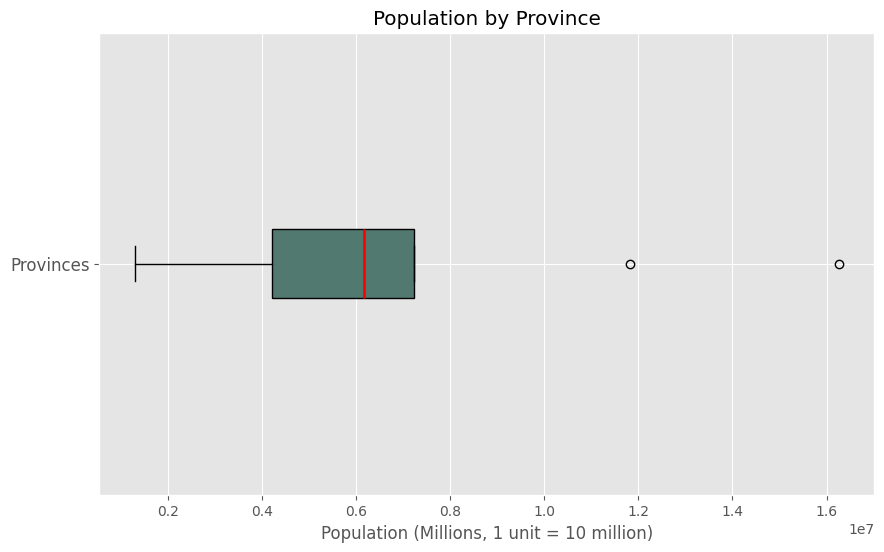

In [161]:
# Compute summary statistics for the Population column
demographics_stats = cleaned_demographic_data['population'].describe()

# Set float format for readability (integer format)
pd.options.display.float_format = '{:,.0f}'.format

# Print the summary statistics with headers
print("\nSummary Statistics for Population:")
print(demographics_stats)

# Access the population sheet
population_data = cleaned_demographic_data['population']

# Plotting the boxplot with custom colors
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(population_data['population'], vert=False, patch_artist=True)

# Customizing the boxes
for box in boxplot['boxes']:
    box.set(facecolor='#52796f')  # Fill color inside the box
    box.set(edgecolor='black')       # Edge color of the box
    box.set(linewidth=1)            # Edge line width of the box

# Customizing the medians
for median in boxplot['medians']:
    median.set(color='red', linewidth=2)

plt.title('Population by Province')
plt.xlabel('Population (Millions, 1 unit = 10 million)')
plt.yticks([1], ['Provinces'], size=12)  # Single y-tick for better readability
plt.show()

**Understanding the Boxplot:**  
    
Our analysis hinges on the characteristics revealed by the household survey data visualized through a boxplot.
  
**Here's a breakdown of key takeaways:**

**1. Population Variation:**   
  
- There is a considerable spread in population sizes among the regions, ranging from a **minimum** of **1,294,044** to a **maximum** of **16,266,595**.

**2. Median Population:**

- The median population sits **around 600,000** indicating half of South Africa's provinces surpass this mark, while the remaining half fall below.  

**3. Standard Deviation:** 
  
- The large standard deviation of **4,619,804** reinforces the significant variability in population sizes. This indicates that the regions' populations are quite spread out from the mean
  
**4. Interquartile Range (IQR):**

- The IQR further supports this notion. It spans from **4,206,408 (25th percentile)** to **7,230,858 (75th percentile)**, implying that a substantial portion of the regions have populations within this range. However, it also highlights the presence of regions with populations considerably larger than the upper quartile.
  
**5. Whiskers:**
  
- The whiskers extend to **2 million** and **16 million** suggesting outliers on either end of the distribution. The whisker wisdom is leaning towards **both high and low** populations.

**Potential Population Distribution:**
 
Based on current South African demographics data, here's a possible distribution of provinces by population:
  
- **High Population (Above 16 Million):** Gauteng (most likely), KwaZulu-Natal (possible)

- **Medium Population (Within IQR, Around 600,000):** Western Cape, Eastern Cape, Limpopo (possibles), Mpumalanga (most likely)

- **Low Population (Below 2 Million):** Northern Cape (most likely), Free State, North West (most likely)

**Important Considerations:**
  
This is just a **hypothetical distribution** based on general knowledge and the boxplot characteristics. Urbanization, economic opportunities, and geographic features significantly influence population distribution in South Africa.

(ii) School Size Distribution (Learners and Educators)


Statistics for cleaned_school_data:
        National_Emission_Number  Number_of_Learners_2023  \
count                    24,998                   24,998   
mean                519,331,159                      542   
std                 266,547,234                      444   
min                 100,000,029                        0   
25%                 200,501,321                      186   
50%                 500,256,688                      411   
75%                 700,400,628                      814   
max                 996,606,833                    3,233   

       Number_of_Educators_2023  
count                    24,998  
mean                         19  
std                          15  
min                           0  
25%                           8  
50%                          14  
75%                          27  
max                         372  


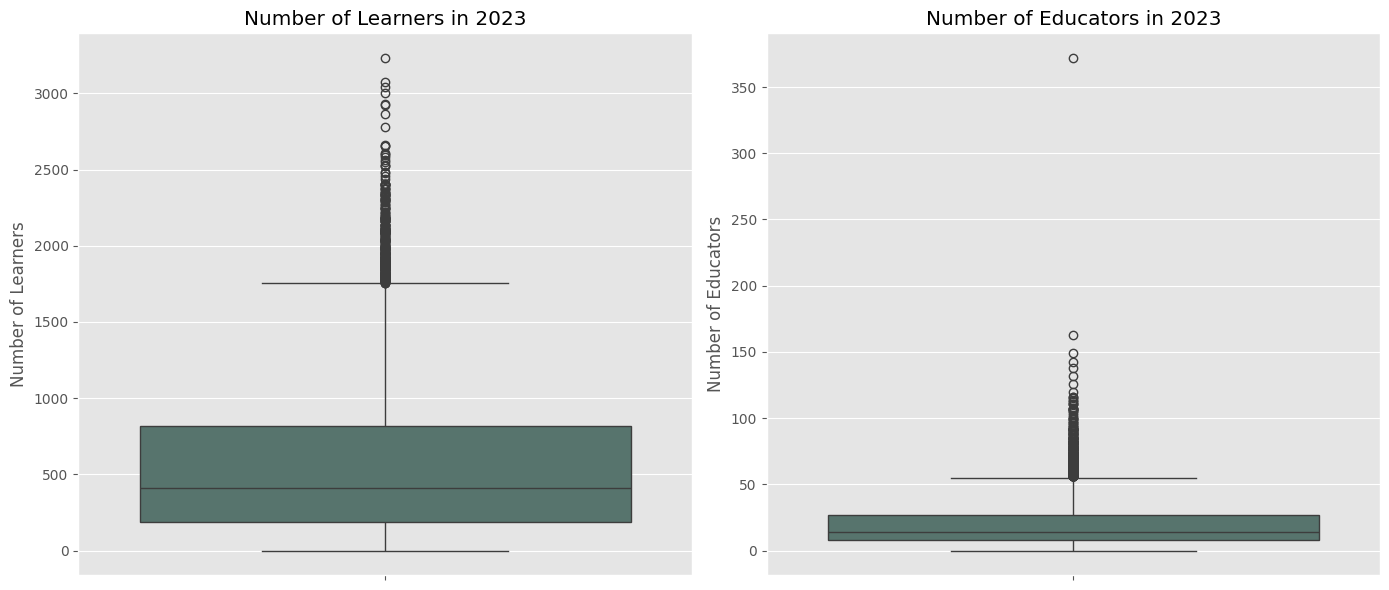

In [162]:
# Compute basic statistics for cleaned_school_data and round to 0 decimal places
cleaned_school_stats = cleaned_school_data.describe().round(0)

# Print statistics for cleaned_school_data
print("\nStatistics for cleaned_school_data:\n", cleaned_school_stats)

# Set the size of the plot
plt.figure(figsize=(14, 6))

# Create a boxplot for the number of learners
plt.subplot(1, 2, 1)
sns.boxplot(y=cleaned_school_data['Number_of_Learners_2023'], color='#52796f')
plt.title('Number of Learners in 2023')
plt.ylabel('Number of Learners')

# Create a boxplot for the number of educators
plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_school_data['Number_of_Educators_2023'], color='#52796f')
plt.title('Number of Educators in 2023')
plt.ylabel('Number of Educators')

# Show the plot
plt.tight_layout()
plt.show()

**Learners Distribution Analysis:**

**Number of Learners in 2023**

- **Count:** 24,998 (Total number of schools).  
  
- **Mean:** 542 learners per school.  This indicates that, on average, schools have around 542 students enrolled. 
  
- **Standard Deviation:** 444 learners per school.  
  
- **Minimum:** 0 learners per school.  
  
- **Skewed Distribution:** The quartile analysis reveals a right-skewed  distribution.
  
- **First Quartile (Q1):** 186 learners per school (25% of schools have fewer than 186 learners). 
   
- **Median (Q2):** 411 learners per school (50% of schools have fewer than 411 learners). 
   
- **Third Quartile (Q3):** 814 learners per school (75% of schools have fewer than 814 learners). 
   
- **Maximum:** 3,233 learners per school.  
   

  
**Number of Educators in 2023** 
  
- **Count:** 24,998 (Total number of schools)  

- **Mean:** 19 educators per school

- **Standard Deviation:** 15 educators per school 

- **Minimum:** 0 educators per school 

- **Skewed Distribution:** Similar to the learner distribution, the distribution of educators also leans towards the right.

- **First Quartile (Q1):** 8 educators per school (25% of schools have fewer than 8 educators)  

- **Median (Q2):** 14 educators per school (50% of schools have fewer than 14 educators)  

- **Third Quartile (Q3):** 27 educators per school (75% of schools have fewer than 27 educators) 

- **Maximum:** 372 educators per school  

**Learner-to-Educator Ratio:**  
- The high average learner-to-educator ratio (28:1) suggests a potential shortage of educators, especially for specialized subjects. 
  
- This could limit opportunities for hands-on learning and skill development in areas like electronics, programming, or carpentry. 
  
-  It is important to acknowledge that this is just a national average, and the actual student-teacher ratio might vary depending on factors like school location, grade level, and subject areas.


In summary, this data indicates diversity in the sizes of both learner and educator populations across the schools, with some schools having much larger or smaller populations than the majority.

(iii) Age Distribution

Summary Statistics for Age Group:
       age_0 _04  age_5_24  age_25_64  age_65_plus
count          9         9          9            9
mean     645,716 2,405,926  3,375,441      393,379
std      384,408 1,520,984  2,529,695      246,124
min      130,388   450,328    619,179       94,149
25%      432,755 1,509,807  2,020,763      237,951
50%      615,122 2,246,315  2,691,308      317,495
75%      712,015 2,506,026  3,886,267      483,154
max    1,311,912 5,101,062  8,974,542      879,078




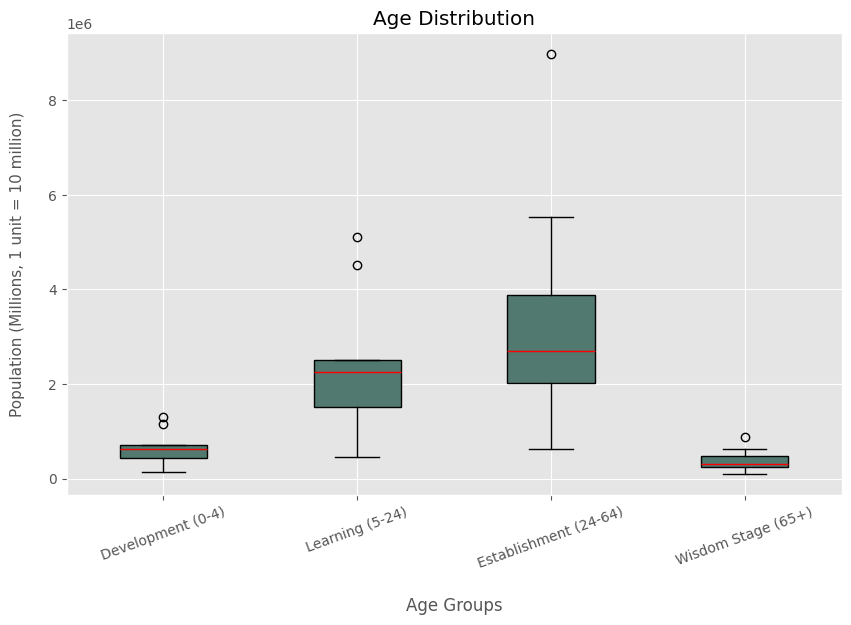

In [163]:
# Compute summary statistics on the DataFrames
age_group_summary = cleaned_demographic_data['age_group'].describe().round(0)

# Print the summary statistics with headers
print("Summary Statistics for Age Group:")
print(age_group_summary)
print("\n")

# Create the box plot
plt.figure(figsize=(10, 6))

# Create the box plot and store the box properties
box = cleaned_demographic_data['age_group'].boxplot(patch_artist=True, return_type='dict')

# Customize the box plot'#52796f'
colors = ['#52796f', '#52796f', '#52796f', '#52796f']  # Color for the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')  # Set the outline color to black

# Make the median line red
for median in box['medians']:
    median.set(color='red', linewidth=1)

# Set the whiskers to black
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1)


# Set the box edges to black
for box_edge in box['boxes']:
    box_edge.set_edgecolor('black')

# Set custom x-axis labels
plt.xticks([1, 2, 3, 4], ['Development (0-4)', 'Learning (5-24)', 'Establishment (24-64)', 'Wisdom Stage (65+)'])   

# Add titles and labels
plt.title('Age Distribution')
plt.ylabel('Population (Millions, 1 unit = 10 million)\n', fontsize=11)
plt.xlabel('\nAge Groups')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=20)

# Show the plot
plt.show()

**Central Tendency:**

- The data is **centered around** the **establishment age group (24-64)**. 
- This means the **most frequent** age group in this dataset falls within this range.

**Spread:**

- The interquartile range (IQR) is largest for the establishment group. IQR represents the middle 50% of the data. A larger IQR signifies a wider spread of data points within that group compared to the others.

- In simpler terms, ages in the **establishment group** are **more varied** than the other age groups.

- The whiskers extend further for the learning group (5-24) compared to other groups. 

- Whiskers represent the range of data beyond the IQR. Longer whiskers suggest there might be more outliers (data points significantly higher or lower than the rest) in the **learning group**. 

- The presence of two data points plotted above the upper whisker for this group confirms outliers on the higher end of the age range.

**Skew:**

- The overall population appears skewed slightly to the **right**. This means the distribution is asymmetrical, with a tail extending towards the older **age groups (65+)** compared to the younger age groups.

**Overall, this boxplot suggests:**

- A **significant portion** of the population falls within the **working/establishment age group (24-64)**.

- The age distribution is **wider** for the **working/establishment age group** compared to others.

- There might be more **outliers** on the younger end **(learning group)** and the older end **(65+)** of the age spectrum.

- The population might be **skewed slightly towards older age groups**.





# 3.2 Analysis of Specialization and Skill Development
(i) Main Income Source

Summary Statistics for Main Income Source:
       salaries_wages_commission  business  remittances  pensions    grants  \
count                          9         9            9         9         9   
mean                   3,463,066   551,690      411,497   187,610 2,071,655   
std                    2,979,721   464,145      263,527   141,276 1,222,556   
min                      682,723    64,018       45,783    26,057   434,468   
25%                    1,782,186   290,318      209,686    81,822 1,143,138   
50%                    2,211,619   469,910      428,725   151,216 1,669,566   
75%                    4,976,716   562,499      567,782   234,258 2,799,894   
max                   10,281,093 1,580,824      891,065   477,578 4,285,084   

       farming_products_and_services  other_income_sources  no_income  
count                              9                     9          9  
mean                          11,363                67,767     47,429  
std                          

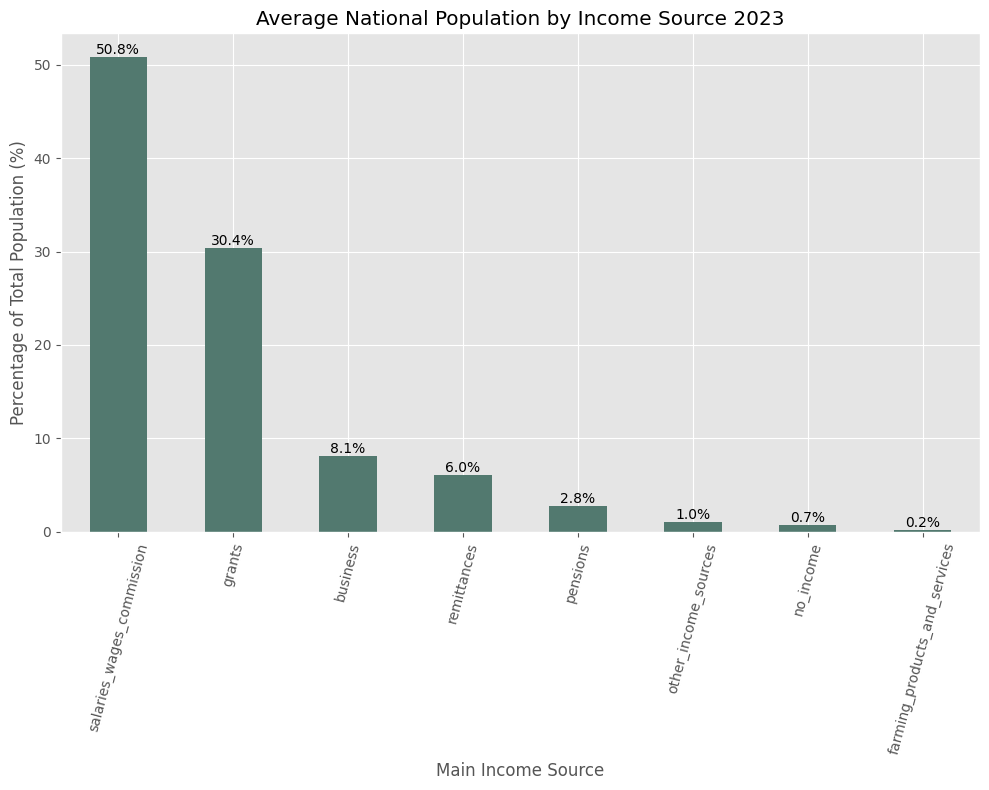

In [164]:
# Compute summary statistics for each DataFrame
main_income_source_summary = cleaned_demographic_data['main_income_source'].describe()

# Set float format for readability (integer format)
pd.options.display.float_format = '{:,.0f}'.format

# Print the summary statistics with headers
print("Summary Statistics for Main Income Source:")
print(main_income_source_summary)
print("\n")

# Extract the mean values
mean_values = main_income_source_summary.loc['mean']

# Normalize the mean values to percentages
mean_values_percentage = (mean_values / mean_values.sum()) * 100
mean_values_percentage = mean_values_percentage.sort_values(ascending=False)

# Plotting the bar chart for Population summary statistics
plt.figure(figsize=(10, 8))
bar_plot = mean_values_percentage.plot(kind='bar', color='#52796f')
plt.title('Average National Population by Income Source 2023')
plt.ylabel('Percentage of Total Population (%)')
plt.xlabel('Main Income Source')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability

# Add data labels on top of the bars
for index, value in enumerate(mean_values_percentage):
    bar_plot.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Income Source Composition:**
- **Salaries/Wages/Commission** stands as the primary source (51%), with an average of 3,463,066 but a wide range from 682,723 to 10,281,093.
  
- **Grants** also play a significant role (30%), averaging 2,071,655.
  
- **Business income** (mean: 551,690) and **remittances** (mean: 411,497) are other noteworthy contributors.
  
**Income Distribution:**

- **Smaller** contributions come from **Pensions** (mean: 187,610), **Farming Products and Services** (mean: 11,363), and **Other Income Sources** (mean: 67,767).
 
- Notably, the **No Income** category has a non-negligible mean of 47,429, suggesting a substantial portion of the population lacks income in certain regions.  

**Economic Disparity:**

- These statistics highlight the significant economic disparities across the regions. 
  
- The reliance on different income sources and the wide variations within each source (reflected by standard deviations and ranges) underscore this economic diversity.  

Summary Statistics for Employment Status:
       employed  unemployed  not_economically_active
count         9           9                        9
mean  1,941,827     997,709                1,930,693
std   1,643,178     836,864                1,121,747
min     369,456     175,601                  379,798
25%   1,042,329     544,996                1,195,657
50%   1,327,403     717,240                2,011,592
75%   2,686,433     894,489                2,226,951
max   5,723,790   2,772,788                3,921,246




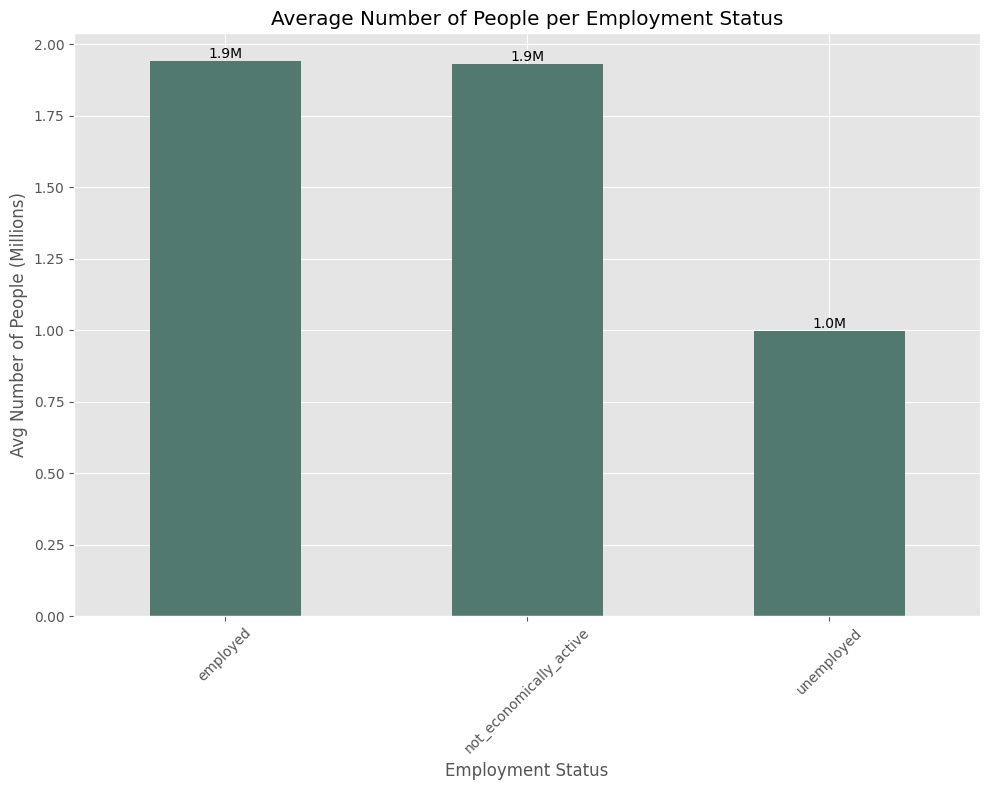

In [165]:
# Compute summary statistics for each DataFrame
employment_status_summary = cleaned_demographic_data['employment_status'].describe()

# Print the summary statistics with headers
print("Summary Statistics for Employment Status:")
print(employment_status_summary)
print("\n")


# Extract the mean values and sort them
mean_values = employment_status_summary.loc['mean'].sort_values(ascending=False)

# Plotting the bar chart for employment status mean values in millions
plt.figure(figsize=(10, 8))
(mean_values / 1e6).plot(kind='bar', color='#52796f')

# Add labels to the bars with mean values in millions
for index, value in enumerate(mean_values):
    plt.annotate(f'{value/1e6:.1f}M', xy=(index, value/1e6), ha='center', va='bottom')

plt.title('Average Number of People per Employment Status')
plt.ylabel('Avg Number of People (Millions)')
plt.xlabel('Employment Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

labor force, employed, not economically active, and unemployed

(iii) Highest Education Level

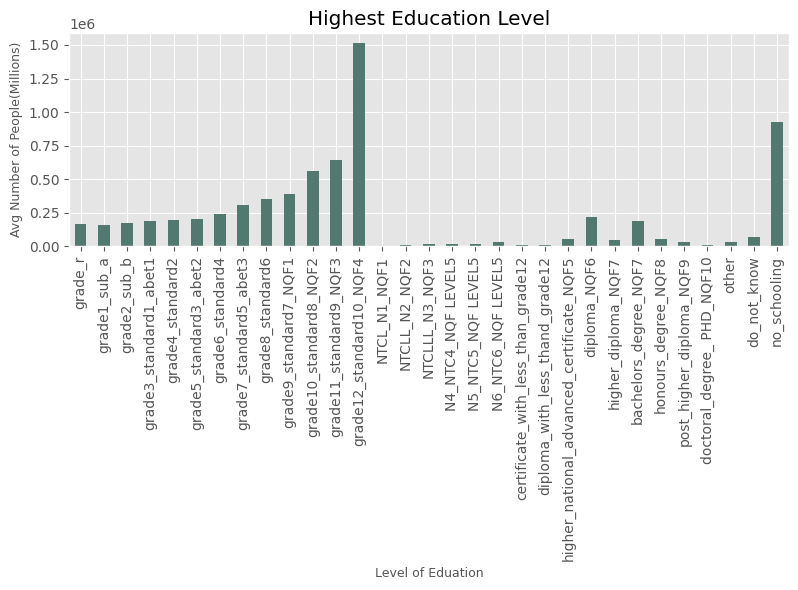

In [166]:
# Compute summary statistics for each DataFrame
highest_education_summary = cleaned_demographic_data['highest_education'].describe()

# Print the summary statistics with headers
# print("Summary Statistics for Highest Education Level:")
# print(highest_education_summary)
# print("\n")

# Plotting the bar chart for Population summary statistics
plt.figure(figsize=(8, 6))
highest_education_summary.loc['mean'].plot(kind='bar', color='#52796f')
plt.title('Highest Education Level')
plt.ylabel('Avg Number of People(Millions)',size=9)
plt.xlabel('Level of Eduation',size=9)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Grade Level Distribution**

**Average Student Population:**

- The data reveals a trend of **increasing average** student population as students progress through the grades.

- **Grade 12** boasts the **highest average** (around 241,018), whereas **Grade R** has the **lowest** (around 164,349).
  
**Variability in Class Sizes:**

- Standard deviations highlight **significant variability** in student populations across grades.

- **Grade R** exhibits a much **larger standard deviation** (around 113,740) compared to **Grade 12** (around 52,260).

- This suggests potentially **wider variations** in class sizes for lower grades.
Educational Qualification Breakdown

**Predominant Qualification:**

- **Grade 12 - Standard 10 - NQF4** emerges as the **most common** qualification, with around 598,926 individuals. 

- This likely signifies the completion of secondary school education.

**Educational Attainment Trends:**

- The number of individuals generally increases up to **Grade 12 - Standard 10 - NQF4** and then shows a steady **decline** for **higher qualifications (college degrees, postgraduate degrees)**.

- This pattern suggests a potential disparity in access to higher education opportunities.

**Quantifying the Gap:**

- To illustrate the disparity, the data indicates that the number of individuals with **bachelor's degrees (NQF7) and postgraduate degrees (Masters, PhDs)** is significantly **lower** (mean: 295 666) compared to **Grade 12-Standard 10-NQF4** (mean:643 577).

**Potential Link Between Grade Levels and Qualifications**

- The observed rise in student population up to Grade 12 might correlate with the **high** number of individuals in **Grade 12 - Standard 10 - NQF4**, which likely represents the completion of secondary school.

- The subsequent **decline** in student population **after Grade 12** could be attributed to individuals entering the workforce or pursuing higher education, which aligns with the observed **decrease** in qualification attainment at higher levels.

(iv) specialization

In [167]:
# Compute summary statistics for specialization column
specialization_summary = cleaned_school_data['Specialization'].describe()

# Set float format for readability (integer format)
pd.options.display.float_format = '{:,.0f}'.format

# Print the summary statistics with headers
print("Summary Statistics for Specialization:")
print(specialization_summary)
print("\n")

Summary Statistics for Specialization:
count               24998
unique                 10
top       ORDINARY SCHOOL
freq                19425
Name: Specialization, dtype: object




This analysis indicates that the dataset contains **10 unique specializations**, with **Ordinary School** being the **most frequent** specialization, appearing 19,425 times out of 24,998 entries. 

This suggests that the **majority (77%)** of entries in the dataset are **related** to **ordinary schools**, highlighting the prevalence of this type of educational institution in the analyzed data.

3.3 Analysis of Infrastructure

(i) Time taken to school

Summary Statistics for Time Taken to School:
       less_than_15_minutes  15_30_minutes  31_60_minutes  61_90_minutes  \
count                     9              9              9              9   
mean                603,340        951,652        255,328         18,426   
std                 398,111        597,361        210,231         18,450   
min                 118,922        158,925         38,926            686   
25%                 366,535        514,243        128,100          4,611   
50%                 555,735        750,254        174,213          9,565   
75%                 751,949      1,302,715        264,849         22,884   
max               1,486,412      1,902,531        693,854         54,469   

       more_than_90_minutes  do_not_know  
count                     9            9  
mean                  9,316        9,467  
std                  18,609       11,258  
min                     318            0  
25%                     868        1,585  
50%         

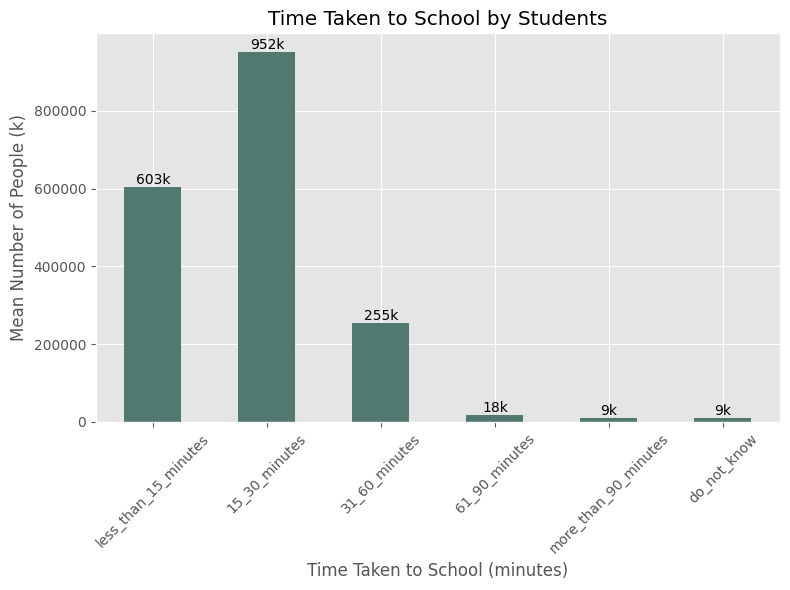

In [168]:
# Compute summary statistics for each DataFrame
time_taken_to_school_summary = cleaned_demographic_data['time_taken_to_school'].describe()

# Print the summary statistics with headers
print("Summary Statistics for Time Taken to School:")
print(time_taken_to_school_summary)
print("\n")

# Plotting the bar chart for Population summary statistics
plt.figure(figsize=(8, 6))
bars = time_taken_to_school_summary.loc['mean'].plot(kind='bar', color='#52796f')
plt.title('Time Taken to School by Students')
plt.ylabel('Mean Number of People (k)')
plt.xlabel('Time Taken to School (minutes)')  # Renamed x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X coordinate of the label
             bar.get_height() + 5,  # Y coordinate of the label (adjust 5 as needed)
             f'{bar.get_height() / 1000:.0f}k',  # Text to display on the label (in thousands)
             ha='center', va='bottom')  # Alignment of the label

plt.tight_layout()
plt.show()

**Majority Benefits from Short Commutes:** 
- A **substantial** portion **(60%)** experiences commutes **under 15 minutes**, potentially boosting attendance and punctuality.

**Longer Commutes Raise Concerns:**
- A sizable group **(32%)** faces commutes between **31-60 minutes**, which could impact daily schedules and well-being. Notably, a **smaller** group experiences even **longer** commutes **exceeding 60 minutes**, potentially leading to increased stress and impacting academic performance.

**Uncertainty Requires Attention:** 
- A **significant** number **(9%)** are unsure about their commute times, highlighting potential data collection challenges or variations in student commuting experiences.

**Further Exploration:**
- Analyze variations in commute experiences across student demographics or school locations.

3.4 Correlation Analysis

(i) Economic Quintile vs. Specialization

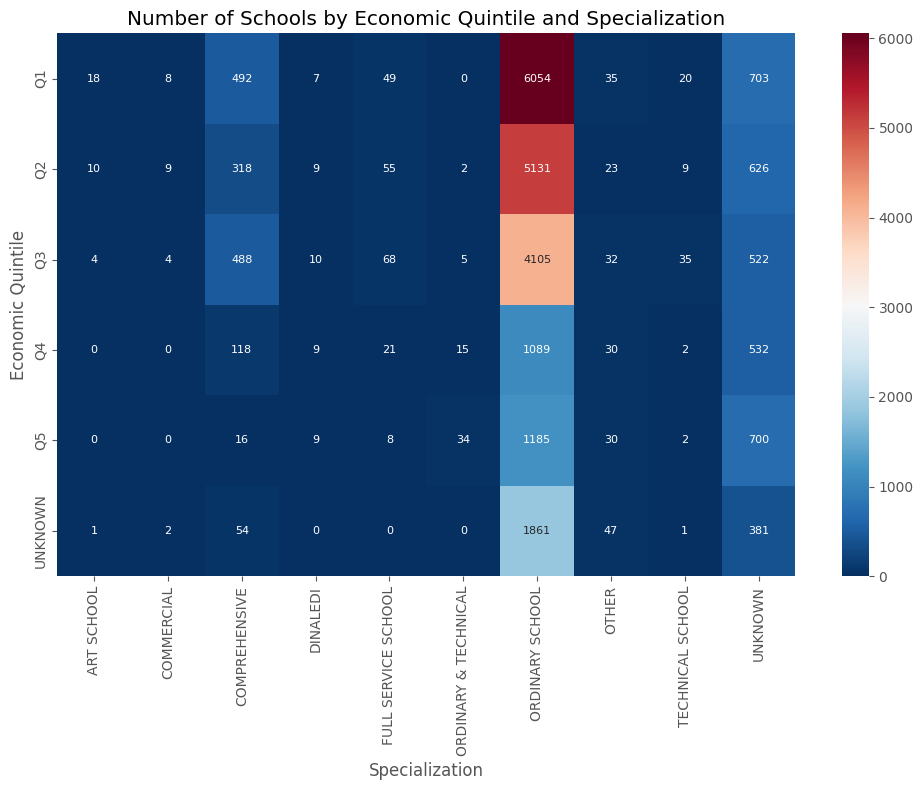

In [169]:
# Group by Economic_Quintile and Specialization, then count the number of schools
school_type_by_quintile = cleaned_school_data.groupby(['Economic_Quintile', 'Specialization']).size().unstack(fill_value=0)

# Create a heatmap using Seaborn with similar style
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(school_type_by_quintile, cmap='RdBu_r', annot=True, fmt='d', annot_kws={"fontsize": 8})

# Adding labels and title
plt.title('Number of Schools by Economic Quintile and Specialization')
plt.xlabel('Specialization')
plt.ylabel('Economic Quintile')

# Display the heatmap
plt.tight_layout()
plt.show()

**Distribution of Specializations:**   
Data Range represents potential variation across quintiles

**Ordinary Schools (1089-6054):**    
- Their presence across all quintiles ensures baseline education.
  
**Comprehensive Schools (54-492):**   
- Offer a broader curriculum but might be limited in distribution.
  
**Technical Schools (1-35):**   
- Though present, their availability seems limited, potentially restricting access to technical careers.
  
**UNKNOWN Specializations (381-703):**   
- This could indicate a lack of data collection or a diverse range of specializations not captured in the available categories.
   
**Uneven Distribution of Schools:**   
Contrary to expectations, the data suggests a potentially higher concentration of schools in lower economic quintiles (Q1 & Q2) compared to higher ones (Q4 & Q5).   

**Quintile Breakdown:** 

- **Quintile 3:**  Appears to have the largest number of schools overall (3,500-4,000). This could be a mix of ordinary and potentially some specialized schools.

- **Quintile UNKNOWN:**  Very few schools (0-500) hinder understanding the educational landscape in this area.

3.5 Comparative Analysis

(i) Infrastructure by Geography type

Summary Statistics for Infrastructure Access by Geography Type:
                    internet_library  desktop_laptop  access_electricity
Urban_Access               1,440,114      10,459,843          38,186,771
Traditional_Access           704,248       5,115,095          18,674,178
Farm_Access                   88,495         642,760           2,346,588




<Figure size 1200x800 with 0 Axes>

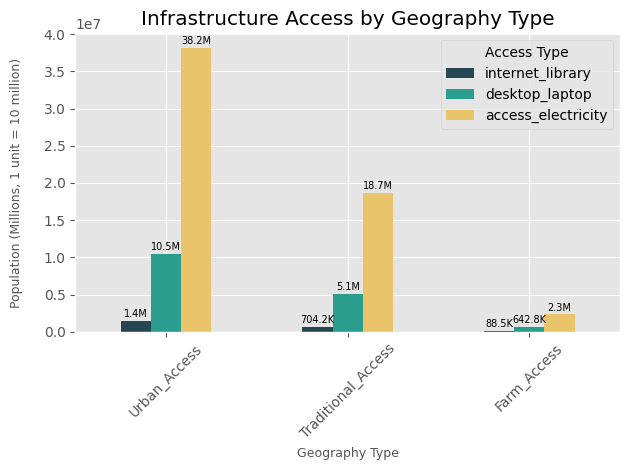

In [170]:
# Load the 'infrastructure' and 'geography_type' DataFrames
infrastructure_df = cleaned_demographic_data['infrastructure']
geography_df = cleaned_demographic_data['geography_type']

# Merge the DataFrames on 'Province'
combined_df = pd.merge(infrastructure_df, geography_df, on='Province')

# Summarize access data for urban, traditional, and farms
infrastructure_access_summary = {
    'Urban_Access': {
        'internet_library': combined_df['yes_internet_library'].sum() * (combined_df['urban'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
        'desktop_laptop': combined_df['yes_desktop_laptop'].sum() * (combined_df['urban'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
        'access_electricity': combined_df['yes_acess_electricity'].sum() * (combined_df['urban'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
    },
    'Traditional_Access': {
        'internet_library': combined_df['yes_internet_library'].sum() * (combined_df['traditional'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
        'desktop_laptop': combined_df['yes_desktop_laptop'].sum() * (combined_df['traditional'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
        'access_electricity': combined_df['yes_acess_electricity'].sum() * (combined_df['traditional'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
    },
    'Farm_Access': {
        'internet_library': combined_df['yes_internet_library'].sum() * (combined_df['farms'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
        'desktop_laptop': combined_df['yes_desktop_laptop'].sum() * (combined_df['farms'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
        'access_electricity': combined_df['yes_acess_electricity'].sum() * (combined_df['farms'].sum() / combined_df[['urban', 'traditional', 'farms']].sum().sum()),
    }
}

# Convert summary to DataFrame
infrastructure_access_df = pd.DataFrame(infrastructure_access_summary).T

# Print the summary statistics
print("Summary Statistics for Infrastructure Access by Geography Type:")
print(infrastructure_access_df)
print("\n")

# Function to format numbers with 'M' for millions and 'K' for thousands
def format_number(num):
    if num >= 1e6:
        return f'{num / 1e6:.1f}M'
    elif num >= 1e3:
        return f'{num / 1e3:.1f}K'
    else:
        return f'{num:.0f}'

# Plotting the bar chart for Infrastructure Access by Geography Type
plt.figure(figsize=(12, 8))
ax = infrastructure_access_df.plot(kind='bar', color=['#264653', '#2a9d8f', '#e9c46a'])
plt.title('Infrastructure Access by Geography Type')
plt.ylabel('Population (Millions, 1 unit = 10 million)\n',size=9)
plt.xlabel('Geography Type',size=9)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Access Type')

# Adding formatted labels to each bar with increased vertical offset and reduced font size
for p in ax.patches:
    value = p.get_height()
    formatted_value = format_number(value)
    ax.annotate(formatted_value, (p.get_x() + p.get_width() / 2., value), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)  # Increased vertical offset

plt.tight_layout()
plt.show()

This analysis reveals a concerning digital divide across different geographical regions. **Urban areas** boast significantly **higher access** to essential infrastructure **compared** to **traditional** and **farm** settings, highlighting the need for targeted interventions to bridge this gap and promote equitable development.

**Urban Advantage:**

**Internet Library Access:** 
- With an **average** of 1,440,114 (standard deviation: 368,317), **urban areas** have nearly **twice** the internet library access compared to **traditional areas** (704,248) and a staggering **sixteen times** the access compared to **farm areas** (88,495).

**Desktop or Laptop Availability:** 
- **Urban areas** have an **average** of 10,459,843 desktops or laptops (standard deviation: 2,207,456), which is roughly **double** the availability in **traditional areas** (5,115,095) and a significant **sixteen times** more than **farm areas** (642,760).

**Access to Electricity:**

- **Urban areas** boast an **average** of 38,186,771 with electricity access (standard deviation: 9,392,881), which is more than **twice** the access in **traditional areas** (18,674,178) and a whopping **sixteen times** more than **farm areas** (2,346,588).

**The Digital Divide:**

- These disparities highlight a significant digital divide between urban, traditional, and farm settings.

- Limited access to essential infrastructure like internet libraries and computers can severely restrict educational and economic opportunities for people living in non-urban areas.

(ii) Time Taken to School by Geography Type

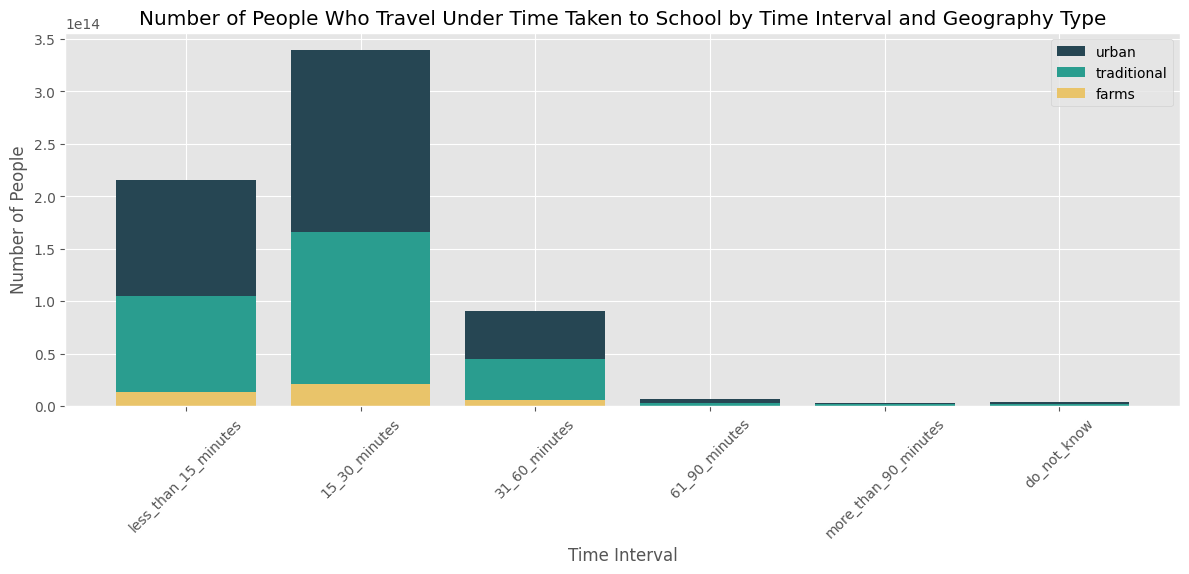

In [171]:
# Merge the two dataframes on 'Province' column
merged_df = pd.merge(cleaned_demographic_data['geography_type'], cleaned_demographic_data['time_taken_to_school'], on='Province')

# Define the time intervals and geography types
time_intervals = ['less_than_15_minutes', '15_30_minutes', '31_60_minutes', '61_90_minutes', 'more_than_90_minutes', 'do_not_know']
geography_types = ['urban', 'traditional', 'farms']

# Calculate the total number of people for each geography type
for geo_type in geography_types:
    merged_df[geo_type + '_total'] = merged_df[geo_type].sum()


# Prepare the data for plotting
plot_data = {
    'Time Interval': [],
    'Geography Type': [],
    'Total': [],
    'Color': []  # Add color information
}

# Calculate the number of people traveling in each time interval by geography type
for geo_type in geography_types:
    for interval in time_intervals:
        plot_data['Time Interval'].append(interval)
        plot_data['Geography Type'].append(geo_type)
        plot_data['Total'].append(merged_df[interval].sum() * merged_df[geo_type + '_total'].values[0])  # Calculate the total number of people in this interval and geography type
        plot_data['Color'].append({'urban': '#264653', 'traditional': '#2a9d8f', 'farms': '#e9c46a'}[geo_type])  # Assign color based on geography type

# Create a dataframe from the plot data
plot_df = pd.DataFrame(plot_data)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
for geo_type in geography_types:
    plt.bar(plot_df[plot_df['Geography Type'] == geo_type]['Time Interval'],
            plot_df[plot_df['Geography Type'] == geo_type]['Total'],
            color=plot_df[plot_df['Geography Type'] == geo_type]['Color'].values[0],  # Use color from plot_data
            label=geo_type)

plt.xlabel('Time Interval')
plt.ylabel('Number of People')
plt.title('Number of People Who Travel Under Time Taken to School by Time Interval and Geography Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Dominant Commute Range:**

- The **majority** of students in both **urban** (depicted in blue) and **farm** (depicted in green) locations travel to school **within** the **31-60 minute** time interval. 

- This suggests that a significant portion of the student population experiences moderate commutes, potentially impacting factors like arrival times and energy levels at school.

**Urban vs. Rural Divide:**

- While the **31-60 minute** commute dominates in both settings, a distinct difference emerges when comparing urban and farm locations.

- The **urban bars** consistently display a **wider range** across all **time intervals**. 

- This indicates that a **larger proportion** of **urban** students experience a wider variety of commute durations, ranging from shorter commutes to a small but existent group with longer commutes **exceeding 90 minutes** (represented by the thinnest bars). 

- In contrast, the **farm location bars** exhibit a **narrower range**, suggesting a more concentrated distribution of commute times, with **fewer** students experiencing significantly **shorter or longer** commutes.

**Uncertainty in Commutes:**

- A noteworthy observation is the presence of a bar for **do not know** in both locations. While relatively **small** compared to other categories, this highlights a portion of the student population **unsure** about their travel times. 

- This uncertainty could reflect challenges in data collection or variability in student commuting experiences (e.g., taking different routes on different days).

**Further Considerations:**

- This initial analysis paints a clear picture of geographical disparities in student commute times. 

- Future analysis could explore the underlying reasons for these differences. 

- Factors like population density, public transportation availability, and school location choices within each geography might contribute to the observed patterns. 

- Additionally, investigating the potential impact of commute times on academic performance or student well-being could be valuable areas for further exploration.

**Summary**  
  
Our exploratory data analysis focused on South African public schools, particularly in urban and rural areas.

**Findings include:**

**School Distribution:**

- The data suggests a potential **imbalance** in school distribution, with a **higher** concentration in lower economic quintiles (Q1 & Q2) compared to wealthier ones (Q4 & Q5).
- Availability of specialized schools (technical, comprehensive) appears **limited**, potentially restricting access to diverse career paths.

**Learner and Educator Distribution:**

- **Significant variation** in the number of learners (0 to 3,233) and educators (0 to 372) per school, with **average** counts of 542 learners and 19 educators **(28:1)**, respectively.

**Population Across Provinces:**

- **Average** provincial population is 6,820,463, with considerable **variation** (1,294,044 to 16,266,595).

**Income Sources:**

- **Salaries/wages/commission** are the primary income source (51%), followed by **grants** (30%).

**Employment Status:**

- **Wide** regional disparities in employment, with **averages** of 1,941,827 **employed**, 997,709 **unemployed**, and 1,930,693 **not economically** active individuals.

**Educational Attainment:**

- **High completion rate** of **Grade 12 - Standard 10 - NQF4**, but steep **decline** in **higher education** attainment.

**Infrastructure Access:**

- **Significant digital divide**, with urban areas having much higher access to internet libraries, desktops/laptops, and electricity compared to traditional and farm settings.

**Commute Times:**

- **Most students** commute **within 31-60 minutes**, with **urban areas** showing a **broader range** of commute durations.

# **4. In-Depth Analysis**

**4.1 Lack of Specialization and Skill Development**

(i) Provincial Population Breakdown by Age Group

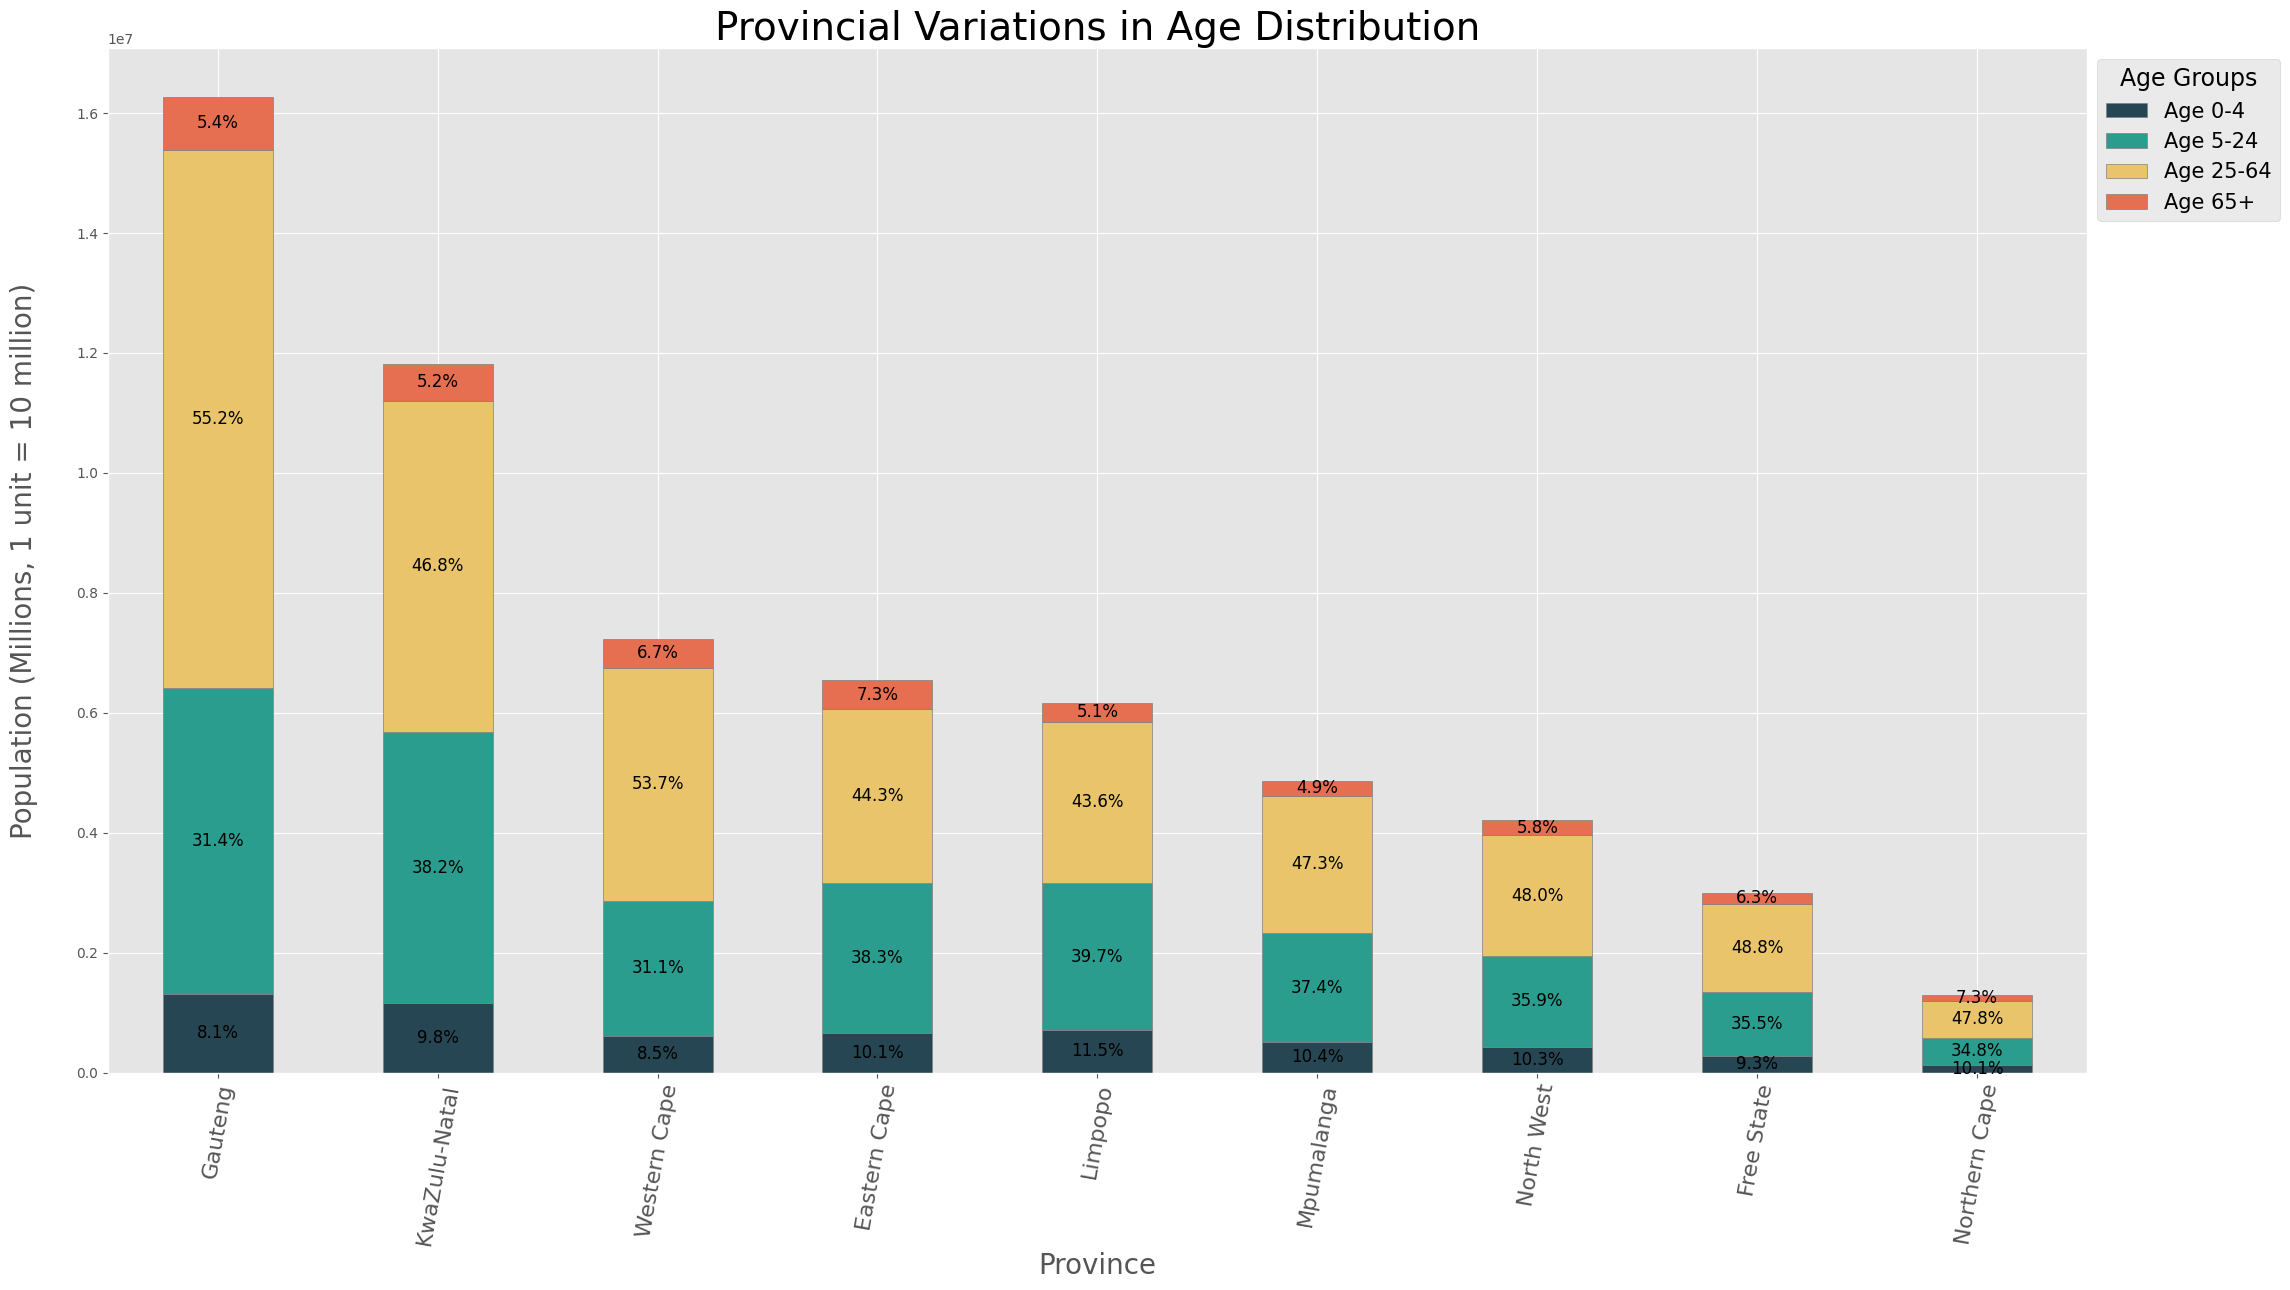

In [172]:
# If age_group_df already has the sum by province, skip this step
age_group_df = cleaned_demographic_data['age_group'].groupby('Province').sum()

# Calculate the total population for each province
age_group_df['total'] = age_group_df.sum(axis=1)

# Sort the DataFrame by total population in descending order
age_group_df_sorted = age_group_df.sort_values(by='total', ascending=False)

# Drop the total column for plotting
age_group_df_sorted = age_group_df_sorted.drop(columns='total')

# Increase the size of the chart
fig, ax = plt.subplots(figsize=(23, 13))  # Increase the size of the chart

# Create the plot
age_group_df_sorted.plot(kind='bar', stacked=True, 
                         color=['#264653','#2a9d8f','#e9c46a','#e76f51'], 
                         edgecolor='grey', ax=ax)

# Add title and labels
ax.set_title('Provincial Variations in Age Distribution', fontsize=28)
ax.set_xlabel('Province', fontsize=20)
ax.set_xticklabels(age_group_df_sorted.index, rotation=80, fontsize=16)
ax.set_ylabel('Population (Millions, 1 unit = 10 million)\n', fontsize=20)

# Update legend labels
age_groups_labels = ['Age 0-4', 'Age 5-24', 'Age 25-64', 'Age 65+']
ax.legend(age_groups_labels, title='Age Groups', bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15, title_fontsize=17)

# Annotate the bars with the percentage values
for i, province in enumerate(age_group_df_sorted.index):
    cumulative_sum = 0
    total = age_group_df.loc[province, 'total']
    for j, age_group in enumerate(age_group_df_sorted.columns):
        value = age_group_df_sorted.loc[province, age_group]
        cumulative_sum += value
        percentage = value / total * 100
        if percentage > 1:  # Only annotate if the segment is larger than 1%
            ax.text(i, cumulative_sum - value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=12, color='black')

# Apply tight layout
plt.tight_layout()

# Show plot
plt.show()

**Youthful Provinces:**

- **Limpopo** and **Mpumalanga** stand out with the highest proportions of residents **aged 0-4** (**11.5%** and **10.4%** respectively). This suggests a youthful population with potentially high birth rates and a growing need for investment in education, and childcare infrastructure.

**Working-Age Powerhouses:**

- **Western Cape** emerges as the province with the most prominent **working-age population (25-64)** at a staggering **53.7%**.
  
- **Gauteng** also boasts a significant working-age demographic **(55.2%)**. These provinces likely house significant economic activity and contribute substantially to the national workforce.

- **Conversely**, **Limpopo** and **Eastern Cape** paint a contrasting picture, with the lowest working-age proportions at **43.6%** and **44.3%** respectively.This might indicate a larger focus on other sectors like agriculture or a higher dependency ratio in these regions.

**Silver Lining:**

- The distribution of the elderly population **(aged 65+)** reveals unique trends. **Eastern Cape** and **Northern Cape** lead the pack with the highest percentages **(7.3%)**. This might indicate a longer life expectancy or a historical migration pattern of retirees to these areas.

- On the other hand, **Mpumalanga** and **Limpopo** boast the smallest elderly populations, with shares of only **4.9%** and **5.1%** respectively. This aligns with their economically vibrant nature, potentially attracting younger generations seeking professional opportunities.



(iii) Visualizing Specialization Distribution Across Provinces

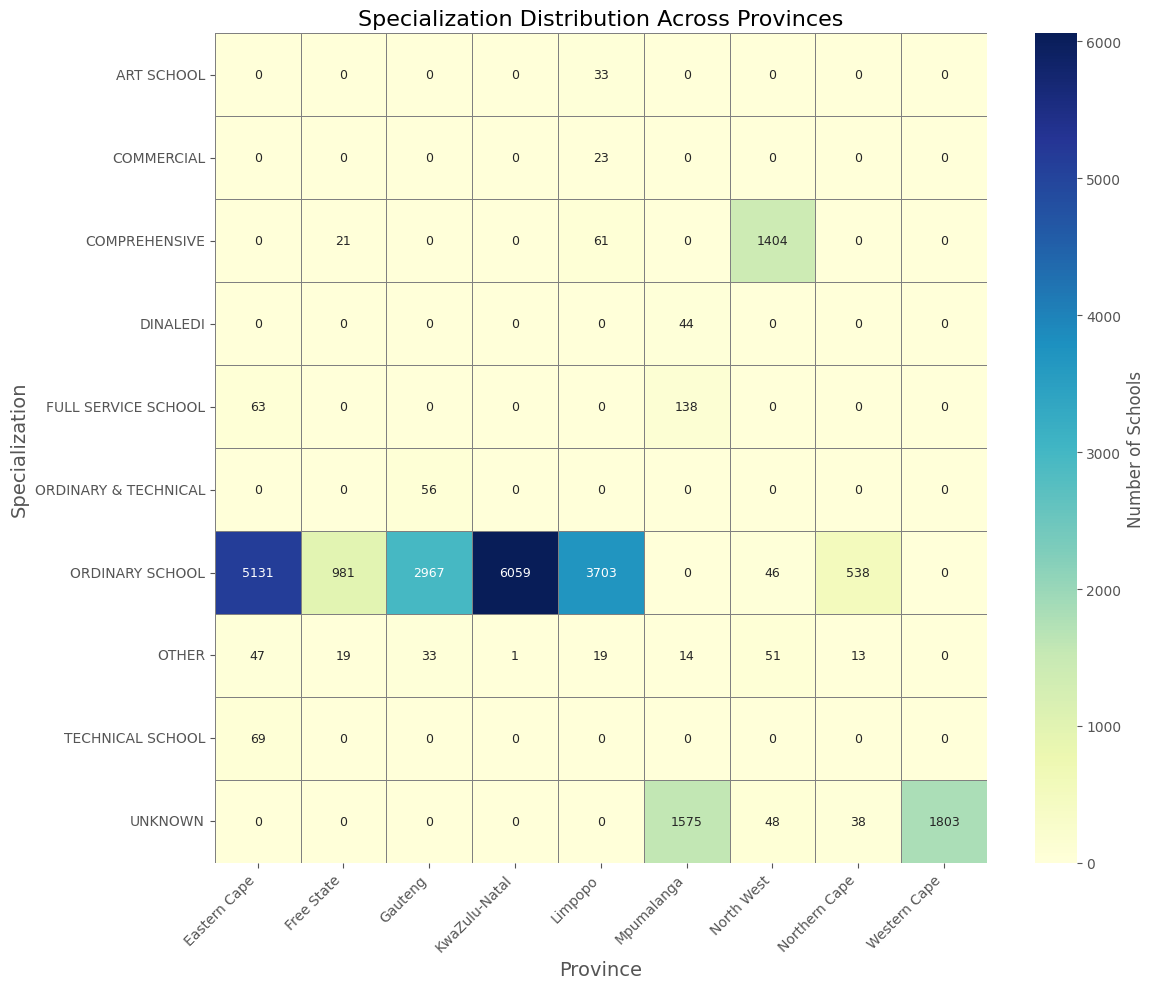

In [216]:
# Group by province and specialization, then sum up the counts
grouped_data = cleaned_school_data.groupby(['Province_Name', 'Specialization']).size().reset_index(name='count')

# Create a pivot table for better visualization
pivot_table = pd.pivot_table(grouped_data, values='count', index='Specialization', columns='Province_Name', fill_value=0)

# Set the display format for float numbers to 0 decimal places
pd.options.display.float_format = '{:.0f}'.format

# Create the heatmap with customizations
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', annot_kws={"fontsize": 9}, 
                      linewidths=.5, linecolor='grey', cbar_kws={'label': 'Number of Schools'}, xticklabels=pivot_table.columns)

# Customize the axes and title for a professional look
plt.title('Specialization Distribution Across Provinces', size=16)
plt.xlabel('Province', size=14)
plt.ylabel('Specialization', size=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout for a clean fit
plt.tight_layout()

# Display the heatmap
plt.show()

**Ordinary Schools: Foundation for Basic Education**

- **KwaZulu-Natal (KZN)** and **Eastern Cape (EC)** have the **highest** number of ordinary schools, with approximately **6,059** and **5,131 schools** respectively.
This suggests a significant emphasis on providing basic education to a large student population in these provinces.
The correlation between these high numbers and the provinces' economic quintiles indicates a focus on foundational education in lower economic regions.

**Comprehensive Schools: Expanding Educational Horizons**

- **North West (NW)** stands out with the **highest** number of comprehensive schools, totaling **1,404**.
**Limpopo (LP)** and **Free State (FS)** have significantly **fewer** comprehensive schools.
The concentration in **NW** may be due to regional educational needs or a historical preference for a broader curriculum, warranting further investigation.

**Specialized Schools: Tailoring Education to Regional Needs**

- **Eastern Cape (EC)** leads in **specialized agricultural (16)** and **technical schools (69)**, aligning with the region's economic activities in agriculture and technical fields.
**Mpumalanga (MP)** has the most **full-service (138)** and **Dinaledi schools (44)**. These schools potentially offer a wide range of programs and specializations, necessitating further exploration to understand their impact.

**Unknown Specializations: A Need for Data Clarity**

- **Western Cape (WC)** reports the **highest** number of schools with **unknown specializations (1,803)**.
This could indicate data collection issues or a wide range of specializations not captured by the current categories, highlighting a need for improved data clarity in this province.

**Implications** 

- The distribution and specialization of schools across South African provinces reflect regional educational priorities and economic needs. The **high** number of **ordinary schools** in **KZN** and **EC** underscores a focus on basic education in economically challenged areas. Conversely, the concentration of comprehensive and specialized schools in **NW** and **EC** suggests targeted educational strategies aligned with regional economic activities.

- The findings emphasize the importance of considering economic factors and regional needs in educational planning. Further research is required to understand the specific impacts of **comprehensive**, **full-service**, and **Dinaledi schools**, as well as to address data clarity issues in provinces like **Western Cape**.

(iv) Household Income in Provinces: Population Distribution by Main Source

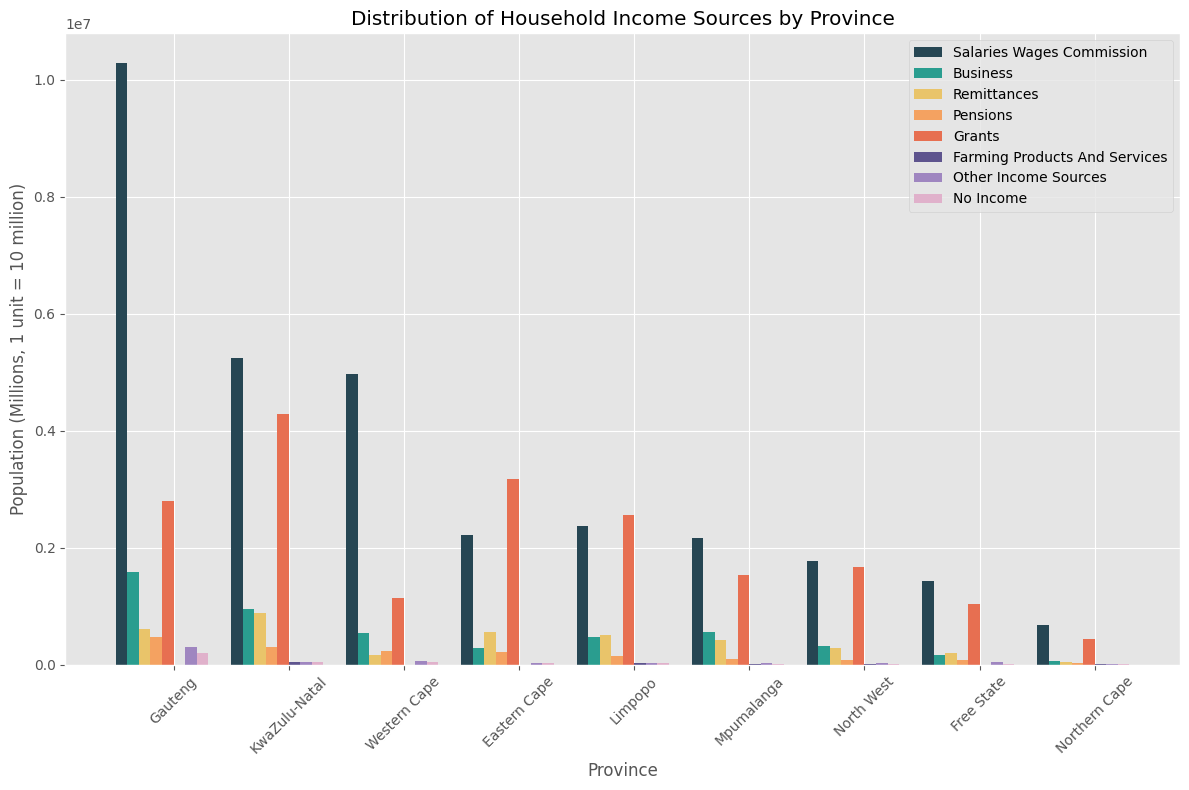

In [174]:
# Define custom colors for the chart
custom_colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#5e548e', '#9f86c0', '#e0b1cb', '#5DADE2']

# Calculate the total income by summing all income columns except 'Province'
cleaned_demographic_data['main_income_source']['total_income'] = cleaned_demographic_data['main_income_source'].iloc[:, 1:].sum(axis=1)

# Sort the data by total income
sorted_income_data = cleaned_demographic_data['main_income_source'].sort_values(by='total_income', ascending=False)

plt.figure(figsize=(12, 8))

x = range(len(sorted_income_data))
bar_width = 0.1

for i, column in enumerate(sorted_income_data.columns[1:-1]):  # Exclude 'Province' and 'total_income' columns
    label = column.replace('_', ' ').title()  # Rename the legend label
    plt.bar([p + i * bar_width for p in x], sorted_income_data[column], width=bar_width, label=label, color=custom_colors[i])

plt.xlabel('Province')
plt.ylabel('Population (Millions, 1 unit = 10 million)')
plt.title('Distribution of Household Income Sources by Province')
plt.xticks([p + bar_width * 4.5 for p in x], sorted_income_data['Province'], rotation=45)
#plt.yscale('log')  # Use logarithmic scale on the y-axis
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

The analysis includes **salaries, wages, commissions, business income, remittances, pensions, grants, farming products and services, other income sources**, and households with **no income**. Understanding these income sources offers insights into the economic activities and dependencies within each region.

**Gauteng**

- **Main Source:** Salaries, wages, and commissions **((10,281,093), 90.36% of total income)**
  
- **Other Notable Sources:** Business income **13.90% (1,580,824)**, grants **24.60% (2,799,894)**.

Gauteng **leads** with the **highest** percentage of income from **salaries, wages, and commissions**, reflecting its status as a major economic hub.

**KwaZulu-Natal**

- **Main Source:** Salaries, wages, and commissions **63.43% (5,244,675)**
  
- **Other Notable Sources:** Grants **51.81% (4,285,084)**, remittances **10.76% (891,065)**

KwaZulu-Natal shows a significant dependence on government **grants** and **remittances**, indicating economic challenges.

**Western Cape**

- **Main Source:** Salaries, wages, and commissions **(53.6%)**
  
- **Other Notable Sources:** Grants **(22.74%)**, business income **(10.96%)**
  
Western Cape exhibits the **highest** reliance on salaries, wages, and commissions, indicating a strong formal employment sector.


**Eastern Cape**
  
- **Main Source:** Salaries, wages, and commissions **(48.30%)**
  
- **Other Notable Sources:** Grants **69.41% (1,143,138)**, remittances **12.40% (161,005)**
  
Eastern Cape's **high** reliance on **grants** suggests significant socio-economic challenges and a need for targeted economic interventions.

**Limpopo**

- **Main Source:** Salaries, wages, and commissions **55.22% (2,382,203)**
  
- **Other Notable Sources:** Grants **59.49% (2,566,813)**, remittances **11.69% (504,119)**


Limpopo shows a **balanced** mix of income sources with a notable contribution from **grants** and **remittances**.

**Mpumalanga**

- **Main Source:** Salaries, wages, and commissions **64.08% (2,176,490)**.
  
- **Other Notable Sources:** Business income **16.56% (108,593)**, grants **45.00% (1,527,969)**


Mpumalanga's **diverse** income sources reflect a **balanced** economic structure with significant contributions from **business income** and **remittances**.


**North West**

- **Main Source:** Salaries, wages, and commissions **60.51% (1,782,186)** 
  
- **Other Notable Sources:** Grants **56.70% (1,669,566)**, business income **10.91% (321,291)**


North West relies heavily on **salaries, wages, and commissions**, with **grants** playing a crucial role in household incomes.


**Free State**


- **Main Source:** Salaries, wages, and commissions **68.09% (1,429,893)**
  
- **Other Notable Sources:** Grants **(49.60%)**, remittances **9.98% (209,686)**


Free State shows a **strong** reliance on **salaries and wages**, with **significant** contributions from **grants** and **remittances**.


**Northern Cape**

- **Main Source:** Salaries, wages, and commissions **75.36% (682,723)**
  
- **Other Notable Sources:** Grants **(47.95%)**, farming products and services **15.63% (434,468)**

Northern Cape stands out with a **high** reliance on **farming products and services**, alongside **salaries and wages**.

**Key observations include:**

- **Gauteng** and **Western Cape** show a strong reliance on formal employment **(salaries, wages, and commissions)**.

- **Eastern Cape**, **KwaZulu-Natal**, and **Limpopo** have a significant dependence on government **grants**.

- **Mpumalanga** and **Northern Cape** have **diverse** income sources, including notable contributions from **business activities** and **farming**.



 Understanding South Africa's Unemployment Landscape by Province

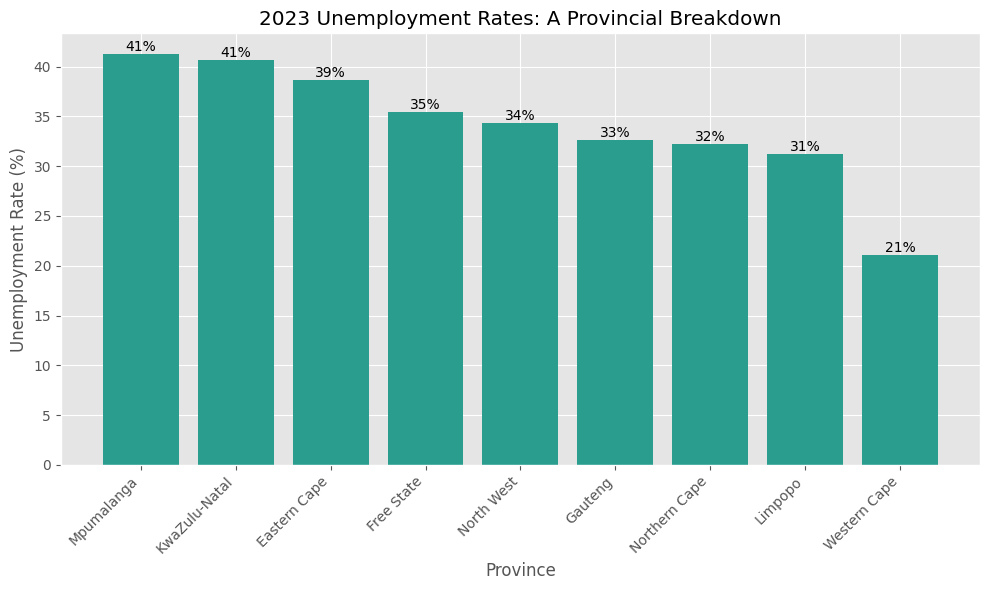

In [175]:
# Assuming clean_demographic_data is already defined and contains the 'employment_status' key.
employment_status = cleaned_demographic_data['employment_status']

# Calculate the labor force (employed + unemployed) for each province
employment_status['labor_force'] = employment_status['employed'] + employment_status['unemployed']

# Calculate the unemployment rate for each province (unemployed / labor force) * 100
employment_status['unemployment_rate'] = (employment_status['unemployed'] / employment_status['labor_force']) * 100

# Sort the DataFrame by unemployment rate (descending)
df = employment_status.sort_values(by='unemployment_rate', ascending=False)

# Print the DataFrame
# print(df.to_string())

# Create a bar chart of the unemployment rate for each province
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Province'], df['unemployment_rate'], color='#2a9d8f')
plt.xlabel('Province')
plt.ylabel('Unemployment Rate (%)')
plt.title('2023 Unemployment Rates: A Provincial Breakdown')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels at the top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.0f}%', ha='center', va='bottom')

# Show the chart
plt.show()

**Significant Provincial Variation:**

- Unemployment rates exhibit substantial discrepancies across provinces. 
  
- **Mpumalanga** takes the **lead** with a concerning **41%** unemployment rate, while **Western Cape** boasts the **lowest** rate at **21%**.

**High Unemployment Pockets:**

- Four provinces - **Mpumalanga**, **KwaZulu-Natal**, **Eastern Cape**, and **North West** - grapple with unemployment rates exceeding **30%**.

**Pockets of Lower Unemployment:**

- **Western Cape** demonstrate a more positive outlook with rates falling below **30%**.

### **4.2. Infrastructure**

(vi) Provincial Breakdown: Urban vs. Rural Schools

<Figure size 1200x800 with 0 Axes>

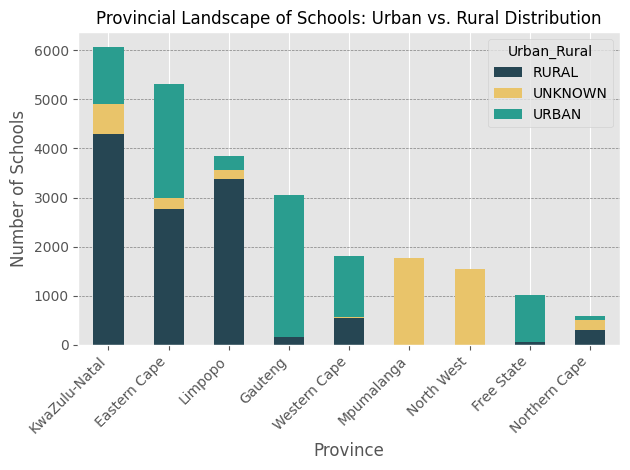

In [185]:
# Group by Province_Name and Urban_Rural_Classification, then count the number of schools
urban_rural_by_province = cleaned_school_data.groupby(['Province_Name', 'Urban_Rural_Classification']).size().unstack()

# Calculate the total number of schools in each province
total_schools_by_province = urban_rural_by_province.sum(axis=1)

# Sort the provinces based on the total number of schools in descending order
sorted_provinces = total_schools_by_province.sort_values(ascending=False).index

# Reindex the urban_rural_by_province DataFrame based on the sorted provinces
urban_rural_by_province_sorted = urban_rural_by_province.reindex(sorted_provinces)

# Define colors for the bars
colors = ['#264653','#e9c46a','#2a9d8f' ]  # Green, Orange, and Steel Blue

# Plotting the distribution of urban-rural schools by province in descending order
plt.figure(figsize=(12, 8))
ax = urban_rural_by_province_sorted.plot(kind='bar', stacked=True, color=colors)
plt.title('Provincial Landscape of Schools: Urban vs. Rural Distribution', size=12)
plt.xlabel('Province')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Urban_Rural')

# Add a horizontal dotted grid line
ax.yaxis.grid(True, linestyle='--', color='gray', linewidth=0.5)

plt.tight_layout()
plt.show()

This analysis delves deeper, exploring the distribution of schools within each province based on location (urban vs. rural areas).

**KwaZulu-Natal (KZN)**

- Retains the top spot with the **most** schools, but with a rural bias. **More** schools seem to be located in rural areas compared to urban centers.

**Eastern Cape (EC)**

- The runner-up , **Eastern Cape**, shows a more **balanced** distribution of schools between urban and rural areas.

**Limpopo (LP)**

- Similar to **KZN**, **Limpopo** exhibits a pattern of having more schools in rural regions.

**Urban Concentration**

- **Gauteng (GT)**, **Free State (FS)**, and **Western Cape (WC)** buck the trend, potentially having more schools in urban areas compared to their rural counterparts.

**Northern Cape (NC)**

- Though with the **fewest** schools overall, **NC** likely has a higher concentration in rural areas.

**Data Gap**

Information regarding the urban-rural split of schools is currently unavailable for **Mpumalanga (MP)** and **North West (NW)** . Further investigation is required to fill this knowledge gap.

(ii) Provincial Breakdown: Learners, Educators, and Schools (Percentage)

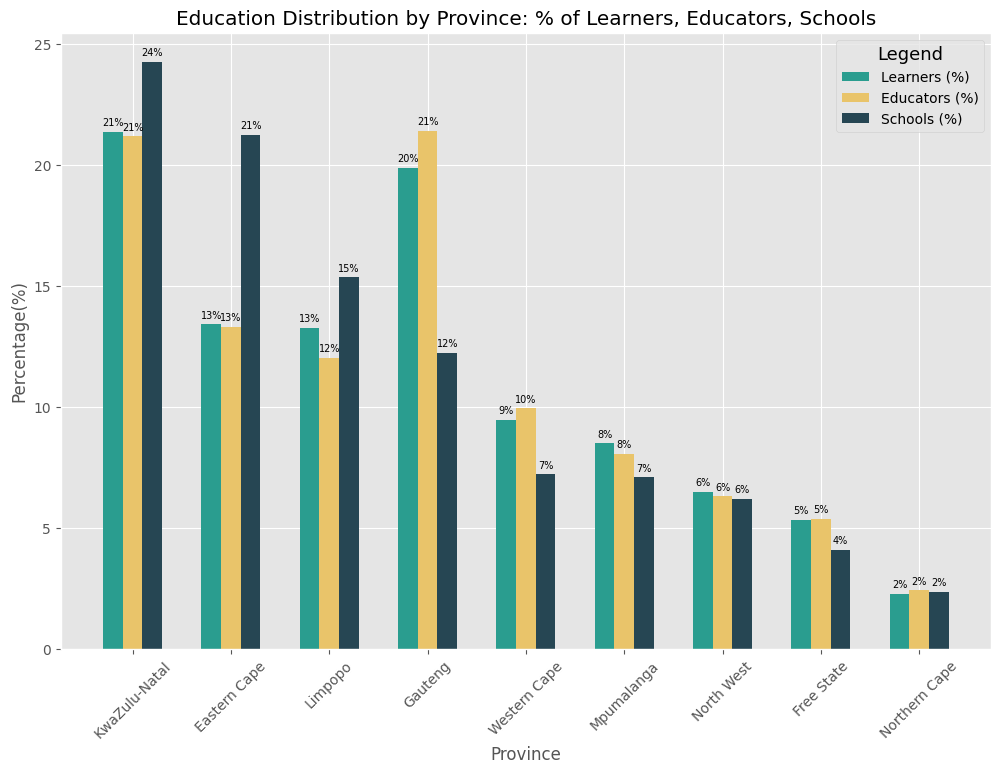

In [191]:
# Grouping by province and aggregating the counts
province_summary = cleaned_school_data.groupby('Province_Name').agg(
    Number_of_Schools=('National_Emission_Number', 'count'),
    Total_Learners=('Number_of_Learners_2023', 'sum'),
    Total_Educators=('Number_of_Educators_2023', 'sum')
).reset_index()

# Sort by number of schools in descending order
province_summary = province_summary.sort_values(by='Number_of_Schools', ascending=False)

# Calculate percentage distribution
province_summary['Learners_Percentage'] = (province_summary['Total_Learners'] / province_summary['Total_Learners'].sum()) * 100
province_summary['Educators_Percentage'] = (province_summary['Total_Educators'] / province_summary['Total_Educators'].sum()) * 100
province_summary['Schools_Percentage'] = (province_summary['Number_of_Schools'] / province_summary['Number_of_Schools'].sum()) * 100

# Plotting the percentage distribution
fig, ax = plt.subplots(figsize=(12, 8))

# Set positions and width for bars
bar_width = 0.2
positions = np.arange(len(province_summary))

# Create bars with custom colors
colors = ['#2a9d8f', '#e9c46a', '#264653']
bars1 = ax.bar(positions - bar_width, province_summary['Learners_Percentage'], bar_width, label='Learners (%)', color=colors[0])
bars2 = ax.bar(positions, province_summary['Educators_Percentage'], bar_width, label='Educators (%)', color=colors[1])
bars3 = ax.bar(positions + bar_width, province_summary['Schools_Percentage'], bar_width, label='Schools (%)', color=colors[2])

# Adding labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Percentage(%)')
ax.set_title('Education Distribution by Province: % of Learners, Educators, Schools')
ax.set_xticks(positions)
ax.set_xticklabels(province_summary['Province_Name'], rotation=45)

# Customizing the legend
legend = ax.legend(title="Legend")
legend.get_title().set_fontsize('13')

# Adding value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=7)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Showing the plot
plt.show()

The dataset shows a balanced distribution across provinces, with total percentages of learners, educators, and schools approximating 100%.

**Highest Concentrations**

- **KwaZulu-Natal (KZN):** KZN leads with 6,060 schools (24%), 2,896,890 learners, and 99,064 educators (21%), indicating a large educational network.
  
- **Eastern Cape (EC):** EC has 5,310 schools (21%), 1,817,435 learners (13%), and 62,280 educators (13%), suggesting smaller school sizes or underutilized capacity.
  
- **Gauteng (GT):** GT, despite fewer schools (3,056 or 12%), has 2,695,226 learners (20%) and 100,202 educators (21%), implying larger, more populous schools.

     
**Lowest Concentrations**

- **Northern Cape (NC):** NC has the lowest numbers across all categories with 589 schools (2%), 307,229 learners (2%), and 11,32 educators (2%), reflecting its smaller population size.

    

**Learner to Educator Ratios**  
  
- **Gauteng (GT):** GT has the highest learner-to-educator ratio, indicating potential overcrowding or larger class sizes.
   
- **Western Cape (WC):** WC maintains a balanced ratio with proportionate numbers of learners and educators, suggesting better resource allocation and manageable class sizes.

    

**Provincial Comparisons**  
  
- **KwaZulu-Natal (KZN) vs. Gauteng (GT):** KZN has more schools, suggesting smaller or more dispersed schools, while GT's high learner and educator numbers indicate larger, more concentrated 

  
**educational institutions.**

- **Limpopo (LP):** LP has a notable number of schools and learners but fewer educators, suggesting higher student-to-teacher ratios.

- **Mpumalanga (MP) and North West (NW):** These provinces show a balanced distribution of schools, learners, and educators, indicating proportional resource allocation.

- **Free State (FS):** FS has fewer schools, learners, and educators, reflecting a less populous region.

(vii) Distance and Education Access: A Look at Urban vs. Rural Student Travel Times

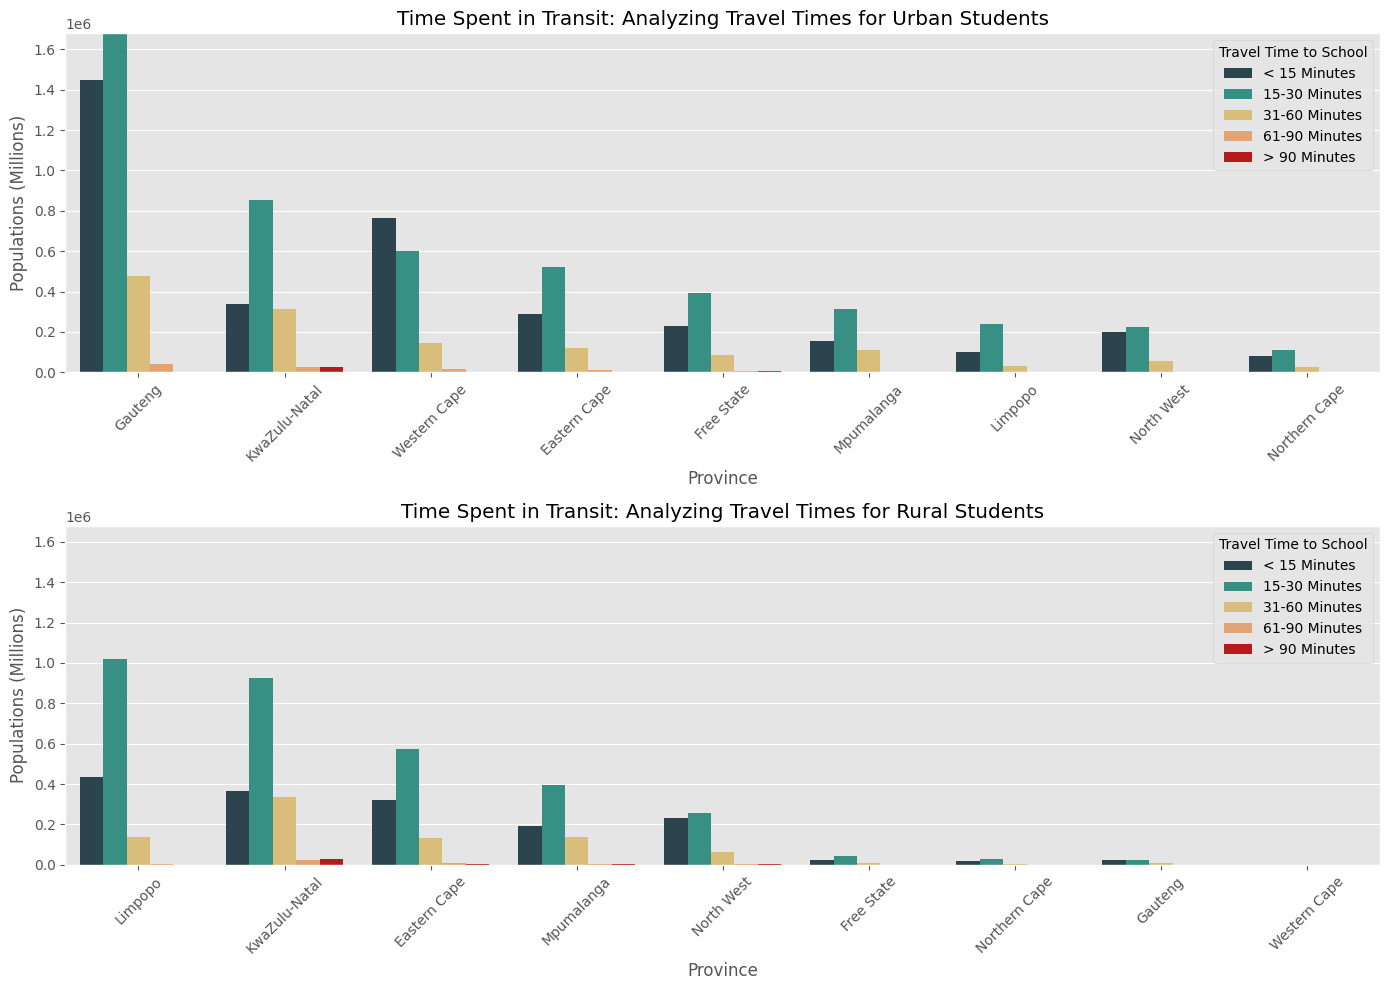

In [196]:
# Merging the dataframes
merged_df = pd.merge(cleaned_demographic_data['geography_type'], cleaned_demographic_data['time_taken_to_school'], on='Province')

# Melting the dataframe for visualization
melted_df = merged_df.melt(id_vars=['Province', 'urban', 'traditional', 'farms'],
                           value_vars=['less_than_15_minutes', '15_30_minutes', '31_60_minutes', '61_90_minutes', 'more_than_90_minutes'],
                           var_name='Time', value_name='Count')

# Creating separate dataframes for urban and rural areas
urban_df = melted_df.copy()
urban_df['Count'] = urban_df['Count'] * (urban_df['urban'] / (urban_df['urban'] + urban_df['traditional'] + urban_df['farms']))

rural_df = melted_df.copy()
rural_df['Count'] = rural_df['Count'] * (urban_df['traditional'] / (urban_df['urban'] + urban_df['traditional'] + urban_df['farms']))

# Sort the dataframes by 'Count' in descending order
urban_df = urban_df.sort_values(by='Count', ascending=False)
rural_df = rural_df.sort_values(by='Count', ascending=False)

# Determine the maximum value for the y-axis across both dataframes
max_count = max(urban_df['Count'].max(), rural_df['Count'].max())

# Define custom colors for the plots
custom_colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#d00000']

# Define the order of legend labels
time_order = ['less_than_15_minutes', '15_30_minutes', '31_60_minutes', '61_90_minutes', 'more_than_90_minutes']

# Custom legend labels
legend_labels = ['< 15 Minutes', '15-30 Minutes', '31-60 Minutes', '61-90 Minutes', '> 90 Minutes']

# Plotting the data
plt.figure(figsize=(14, 10))

# Plot for urban areas
plt.subplot(2, 1, 1)
urban_plot = sns.barplot(data=urban_df, x='Province', y='Count', hue='Time', palette=custom_colors, hue_order=time_order)
urban_plot.set_title('Time Spent in Transit: Analyzing Travel Times for Urban Students')
urban_plot.set_xticks(range(len(urban_df['Province'].unique())))
urban_plot.set_xticklabels(urban_df['Province'].unique(), rotation=45)
urban_plot.set_ylim(0, max_count)  # Setting the y-axis to the same scale
urban_plot.set_ylabel('Populations (Millions)')  # Add y-axis label for urban plot

# Customize legend for urban plot
handles, labels = urban_plot.get_legend_handles_labels()
urban_plot.legend(handles, legend_labels, title='Travel Time to School', loc='upper right')

# Plot for rural areas
plt.subplot(2, 1, 2)
rural_plot = sns.barplot(data=rural_df, x='Province', y='Count', hue='Time', palette=custom_colors, hue_order=time_order)
rural_plot.set_title('Time Spent in Transit: Analyzing Travel Times for Rural Students')
rural_plot.set_xticks(range(len(rural_df['Province'].unique())))
rural_plot.set_xticklabels(rural_df['Province'].unique(), rotation=45)
rural_plot.set_ylim(0, max_count)  # Setting the y-axis to the same scale
rural_plot.set_ylabel('Populations (Millions)')

# Customize legend for rural plot
handles, labels = rural_plot.get_legend_handles_labels()
rural_plot.legend(handles, legend_labels, title='Travel Time to School', loc='upper right')

# Adjusting the layout
plt.tight_layout()
plt.show()

**Urban vs. Rural Student Travel Times: A Summary**

**Urban Students:**

- **Short commutes (<30 min):** Dominant, especially in **Gauteng (54%)**.
- **Long commutes (>60 min):** Uncommon across all provinces.
- **Variability:** Significant differences in travel time distribution by province.

**Rural Students:**

- **Short commutes (<30 min):** Substantial proportion across most provinces **(Limpopo: 27%, Eastern Cape: 27%)**.
- **Long commutes (>60 min):** Less common, with **KwaZulu-Natal** showing the **highest** percentage **(0.5%)**.

**Insights:**

Location significantly impacts student commutes. **Urban areas** offer shorter commutes for many students.
**Rural areas** have a **higher** prevalence of **moderate** commutes **(30-60 min)** compared to **urban areas**.
**Long** commutes are a challenge for a **smaller** percentage of students in both settings.

(iix) Understanding Provincial Variations in Infrastructure Availability

<Figure size 1200x600 with 0 Axes>

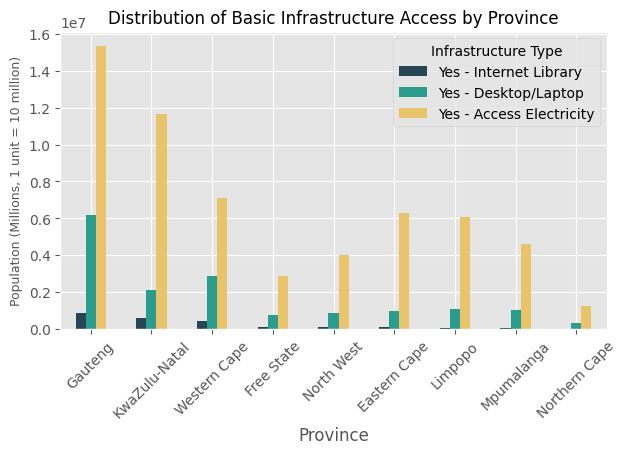

<Figure size 1200x600 with 0 Axes>

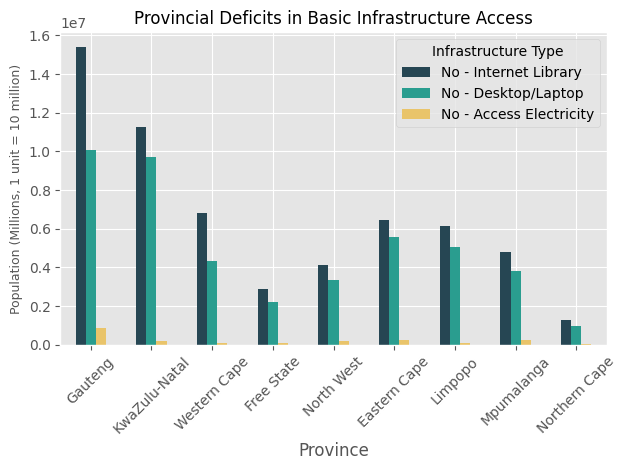

In [214]:
# Assuming clean_demographic_data is a dictionary of DataFrames and 'infrastructure' is one of the keys
infrastructure_df = cleaned_demographic_data['infrastructure']

# Set 'Province' as the index and remove the index column
# infrastructure_df.set_index('Province', inplace=True)

# Sort the dataframe by the total count of "Yes" infrastructure
sorted_infrastructure_df = infrastructure_df.sort_values(by='yes_internet_library', ascending=False)

# Define custom colors for "Yes" and "No" infrastructure
custom_colors_yes = ['#264653', '#2a9d8f', '#e9c46a']  # Adjust colors as needed
custom_colors_no = ['#264653', '#2a9d8f', '#e9c46a']   # Adjust colors as needed

# Legend labels
legend_labels_yes = [
    'Yes - Internet Library',
    'Yes - Desktop/Laptop',
    'Yes - Access Electricity'
]

legend_labels_no = [
    'No - Internet Library',
    'No - Desktop/Laptop',
    'No - Access Electricity'
]

# Plotting the "Yes" infrastructure chart
plt.figure(figsize=(12, 6))
sorted_infrastructure_df[sorted_infrastructure_df.columns[::2]].plot(kind='bar', color=custom_colors_yes)
plt.title('Distribution of Basic Infrastructure Access by Province', size=12)
plt.xlabel('Province')
plt.ylabel('Population (Millions, 1 unit = 10 million)', size=9)
plt.legend(title='Infrastructure Type', loc='upper right', labels=legend_labels_yes)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the "No" infrastructure chart
plt.figure(figsize=(12, 6))
sorted_infrastructure_df[sorted_infrastructure_df.columns[1::2]].plot(kind='bar', color=custom_colors_no)
plt.title('Provincial Deficits in Basic Infrastructure Access', size=12)
plt.xlabel('Province')
plt.ylabel('Population (Millions, 1 unit = 10 million)', size=9)
plt.legend(title='Infrastructure Type', loc='upper right', labels=legend_labels_no)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Internet Access:**
-  There's a **significant** disparity in internet access across provinces. **Gauteng** has the **highest** percentage **(36.24%)**, while **Eastern Cape (1.15%)** and **Limpopo (0.74%)** have the **lowest**.

**Laptop Ownership:**
-  Similar to internet access, laptop ownership varies considerably. **Western Cape (39.94%)** has the highest percentage, followed by **Gauteng (37.88%)** and **Mpumalanga (21.41%)**, while **Eastern Cape (14.45%)** and **Limpopo (17.54%)** have the **lowest** rates.

**Electricity Access:**
  
- Electricity access is widespread across all provinces, with **Gauteng (94.44%)** having the **highest** percentage and **Eastern Cape (91.86%)** having the **lowest**. However, the gap is significantly **smaller** compared to internet access and laptop ownership.

**Inferences:**

These findings highlight the uneven distribution of infrastructure resources in South Africa. While electricity access is relatively good, there's a substantial digital divide regarding internet connectivity and access to technology (laptops) between urban and rural areas. 

# 5. Insights to be Derived

**Critical Need for Specialized Education and Improved Infrastructure in South African Public Schools**

The data presented highlights the crucial need for specialized education and improved infrastructure in South African public schools. Here's a closer look at the evidence:

**1. Mismatch Between Skills and Regional Needs:**

- **High Number of Ordinary Schools:** Provinces like **KwaZulu-Natal** and **Eastern Cape** have the most ordinary schools. While foundational education is essential, it doesn't necessarily equip students with skills directly relevant to the regional economy.
  
- **Uneven Distribution of Specialized Schools:** **Eastern Cape** leads in agricultural and technical schools, aligning with its economic activities. However, the picture is less clear for other provinces. **Mpumalanga** has the most full-service and Dinaledi schools (purpose unclear), while **Western Cape** has the most schools with unknown specializations. This indicates a lack of focus on specific industries in some regions and potential data collection issues.

**2. High Unemployment Rates:**
  
- **Mpumalanga** (41%) and **KwaZulu-Natal** with a heavy reliance on grants, show the highest unemployment rates. This suggests a skills gap between the education system's output and the needs of the labor market.  
  
**3. The Digital Divide:**
  
- **Gauteng** boasts the highest internet access (36.24%) and laptop ownership (37.88%), while **Eastern Cape** (1.15% & 14.45%) and **Limpopo** (0.74% & 17.54%) have the lowest. This digital divide hinders access to information, online learning resources, and **21st-century skills development**, crucial for employability in the modern world.

**4. Learner-Educator Ratios:**

- **Gauteng** has the highest learner-to-educator ratio. While this could be due to **larger schools**, it can also indicate **overcrowded classrooms** and potentially less individualized attention for students.

**5. Addressing the Issues:**

- **Invest in Needs Assessment:** Conduct research to identify the specific skills required in each province's job market. Align specialized schools and curriculum development with these findings.
  
- **Improve Data Collection:** Ensure clear categorization of schools based on specializations. This transparency allows for targeted interventions and resource allocation.
  
- **Bridge the Digital Divide:** Expand internet access and provide laptops or tablets to students in under-resourced areas. Prioritize solar or alternative energy solutions where electricity access remains a challenge.
  
- **Upgrade Infrastructure:** Reduce overcrowding by building new schools or expanding existing ones. Prioritize basic amenities like proper sanitation and ensure schools are in good repair to create a conducive learning environment.
  
**Conclusion:**

By focusing on specialized education, improving infrastructure, and bridging the digital divide, South Africa can create a more equitable and effective public school system. This will equip students with the skills they need to succeed in the workplace and contribute to the country's economic growth.
